In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm.notebook import tqdm as tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

from sympy.parsing import mathematica
import sympy
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.utilities.lambdify import lambdify, lambdastr
import inspect

%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

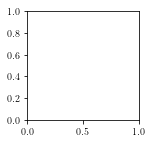

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [17]:
2 / np.pi

0.6366197723675814


init \theta=1.168, \phi=6.007, \psi3.344, 
last \theta=1.578, \phi=4.696, \psi4.663, 
do_calculate_ecoli_Petsc4n: run 1000 loops/times using 22.341275s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-02 22.3s



init \theta=1.168, \phi=6.007, \psi3.344, 
last \theta=1.578, \phi=4.698, \psi4.661, 
do_calculate_ecoli_Petsc4n: run 1000 loops/times using 8.926322s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-02 8.9s


True

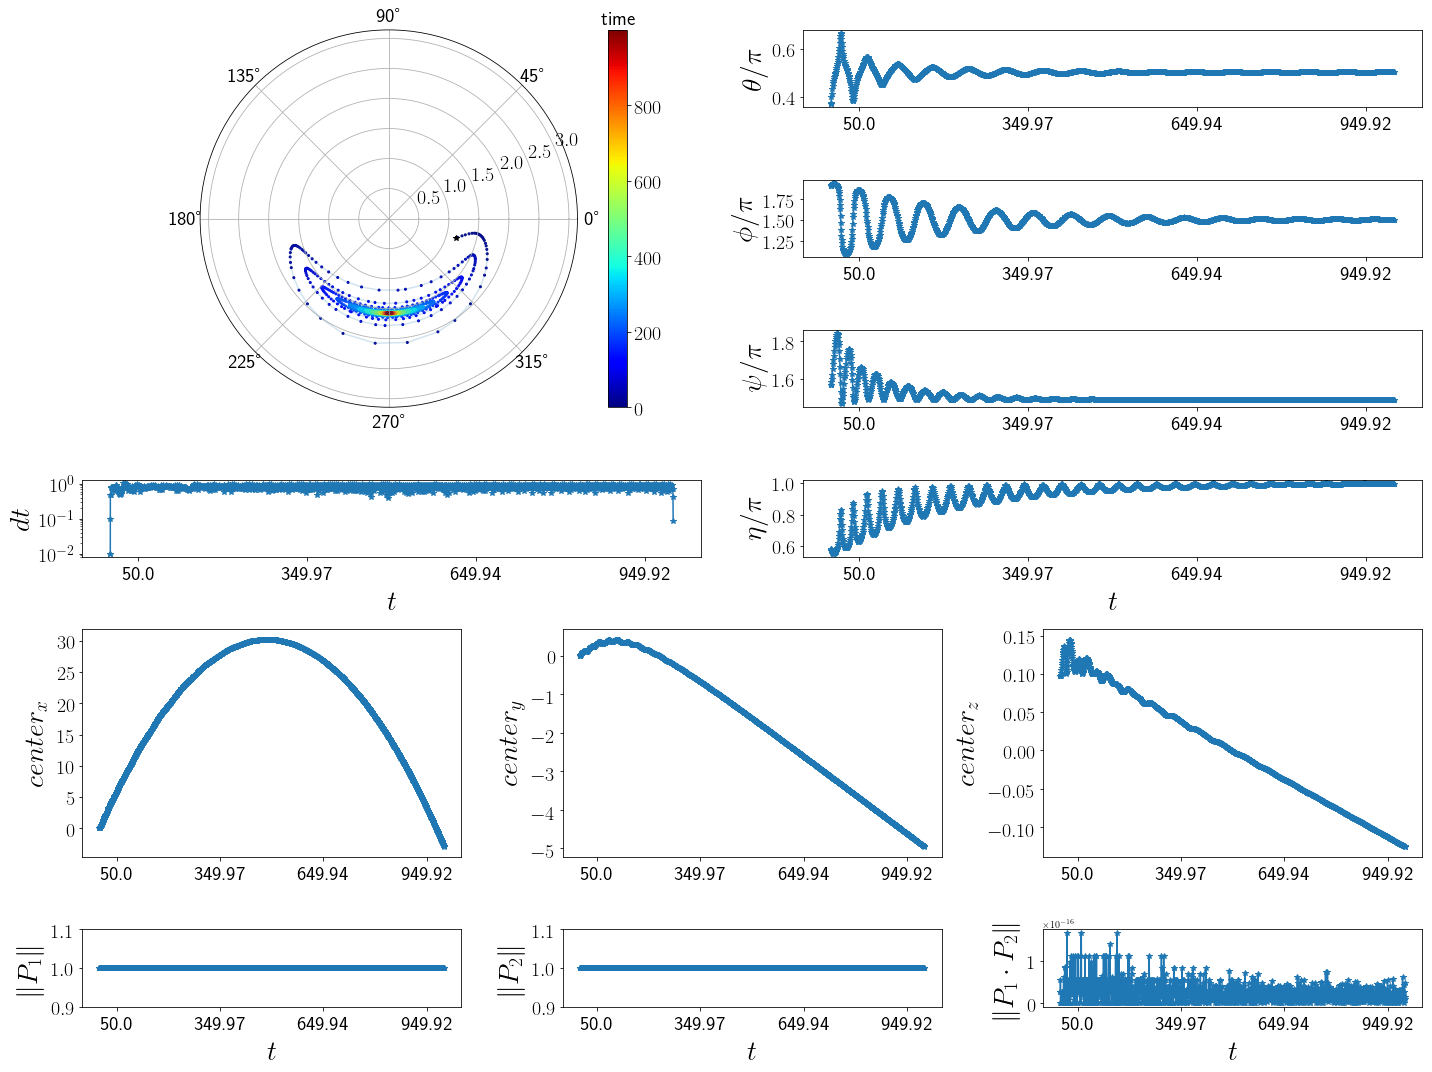

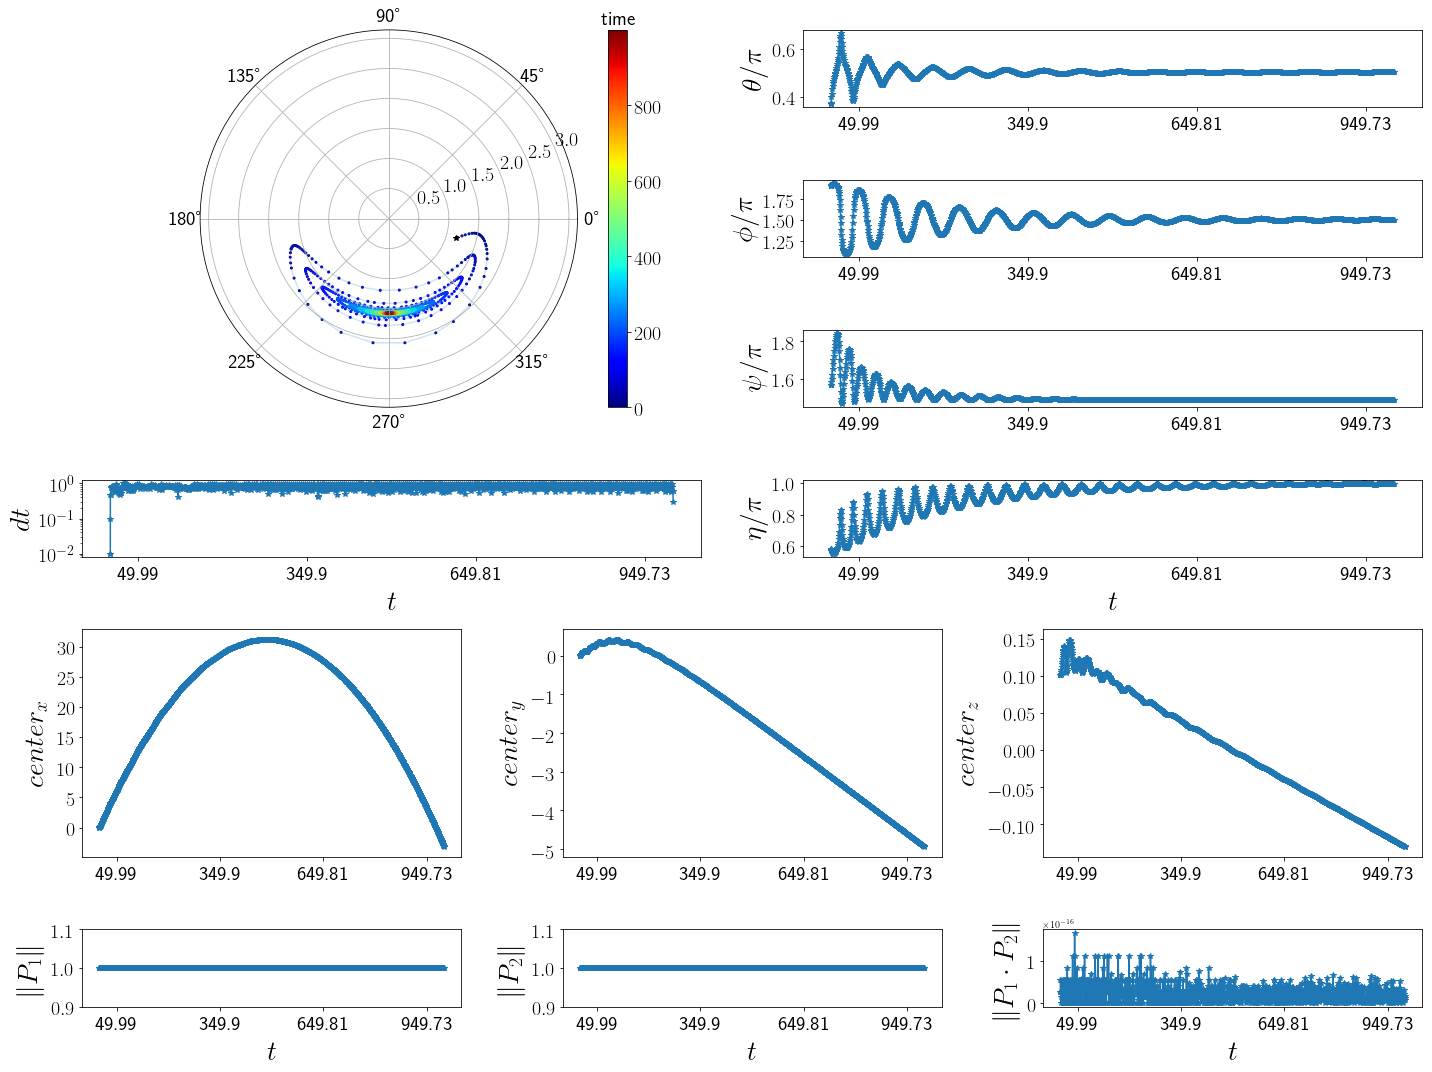

In [322]:
# passive ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
# t_theta, t_phi, t_psi = 1.366, 6.283, 0
# t_theta, t_phi, t_psi = 0, 0.6 * np.pi, 0
t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
max_t = 1000
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 0.01
# save_every = np.ceil(1 / eval_dt / 100)
save_every = 1
omega_tail = 0.9
flow_strength = 1
table_name1 = 'ecoC01B05_tao1_wm%.1f' % omega_tail if 0 < omega_tail < 1 else 'ecoC01B05_tao1_wm%d' % omega_tail
table_name2 = 'ecoC01B05_baseFlow'

# table method 
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc4nPsi(tnorm, t_psi, max_t, update_fun=update_fun, 
                                               rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                               save_every=save_every, table_name=table_name1, 
                                               omega_tail=omega_tail)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# base flow method 
t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                      rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                      save_every=save_every, table_name=table_name2, 
                                      omega_tail=omega_tail, flow_strength=flow_strength)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)


init norm:  0.9424777960769379 , 4.084070449666731 , 0
last norm:  1.6645270577024325 , 4.030599896244889 , 0.8543878443203425
do_calculate_ecoli_Petsc4n: run 1000 loops/times using 55.276198s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-02 55.3s


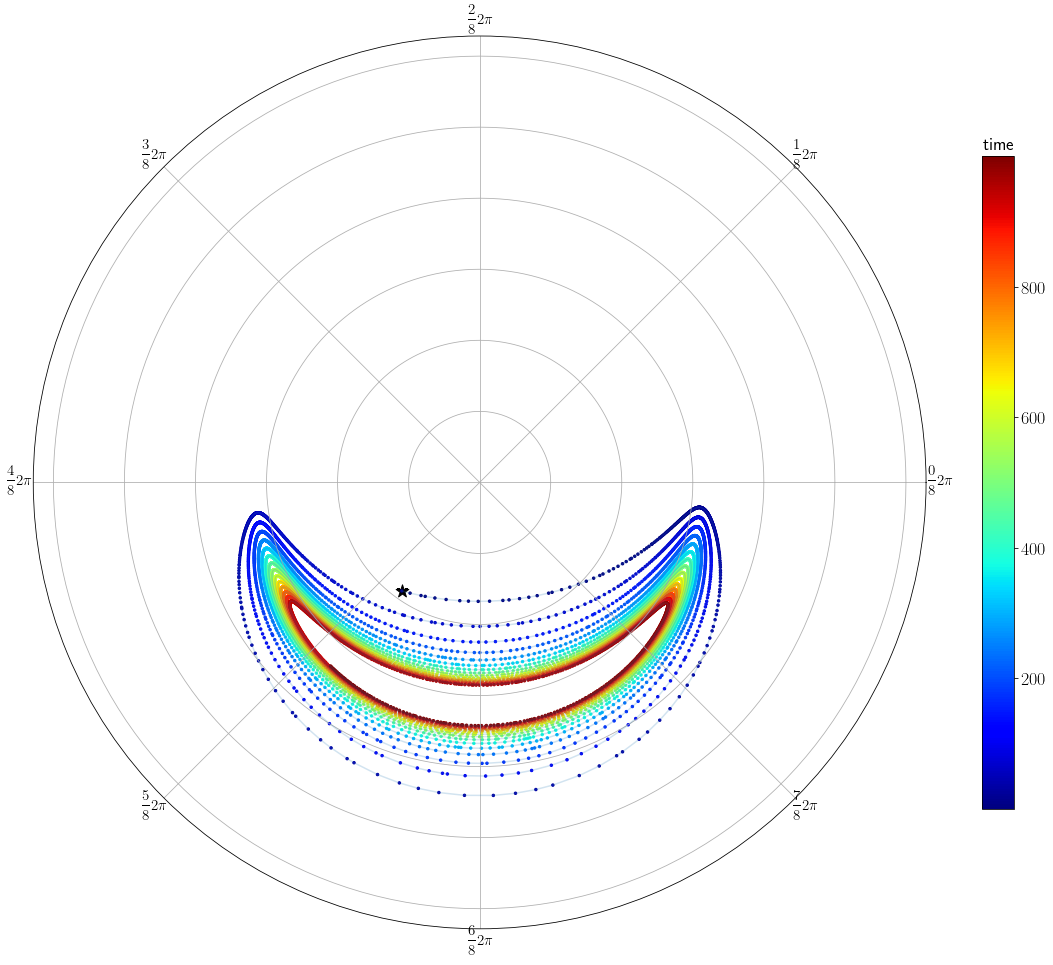

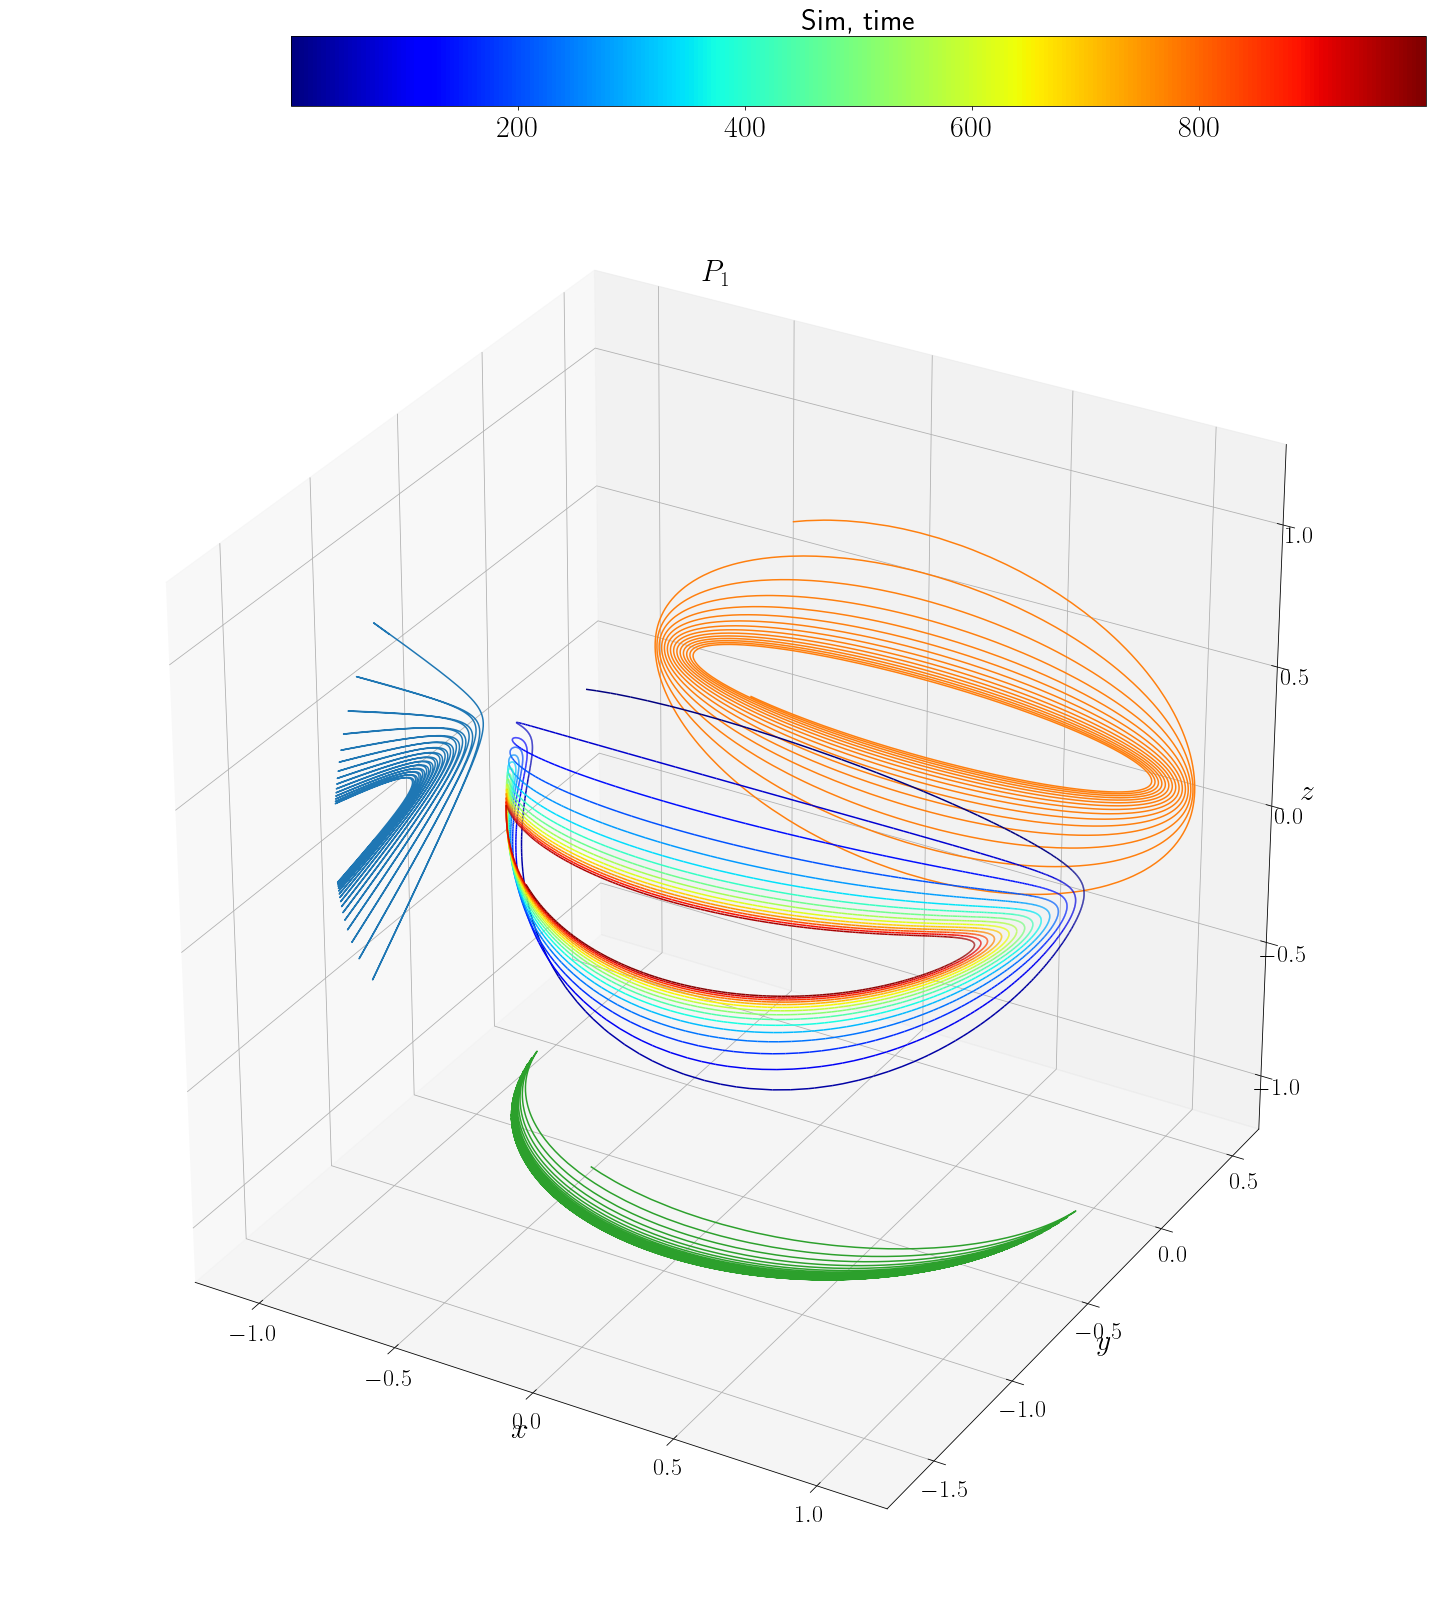

In [27]:
# active ecoli in shear flow, base flow theory, petsc family method 
importlib.reload(spf_tb)
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
t_theta, t_phi, t_psi = 0.3 * np.pi, 1.3 * np.pi, 0
# t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
max_t = 1000
update_fun = '5bs'
rtol = 1e-6
atol = 1e-9
eval_dt = 0.01
save_every = 1
table_name = 'ecoC01B05_4tail_baseFlow'
# omega_tail_list = np.linspace(0, 0.1, 11)
omega_tail_list = (10, )
flow_strength = 1

for omega_tail in omega_tail_list:
    t0 = time()
    tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
    Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
       = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                          rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                          save_every=save_every, table_name=table_name, 
                                          omega_tail=omega_tail, flow_strength=flow_strength)
    t1 = time()
    print('init norm: ', t_theta, ',', t_phi, ',', t_psi)
    print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
    print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
    print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
#     spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                              Table_theta, Table_phi, Table_psi, Table_eta, save_every)
    tidx = Table_t > 0
    spf_tb.show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                          Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None,
                          show_back_direction=False)


init \theta=0.000, \phi=1.714, \psi=0.000, 
last \theta=1.576, \phi=3.151, \psi=1.185, 
do_calculate_ecoli_Petsc4n: run 10000 loops/times using 44.528581s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-02 44.5s


True

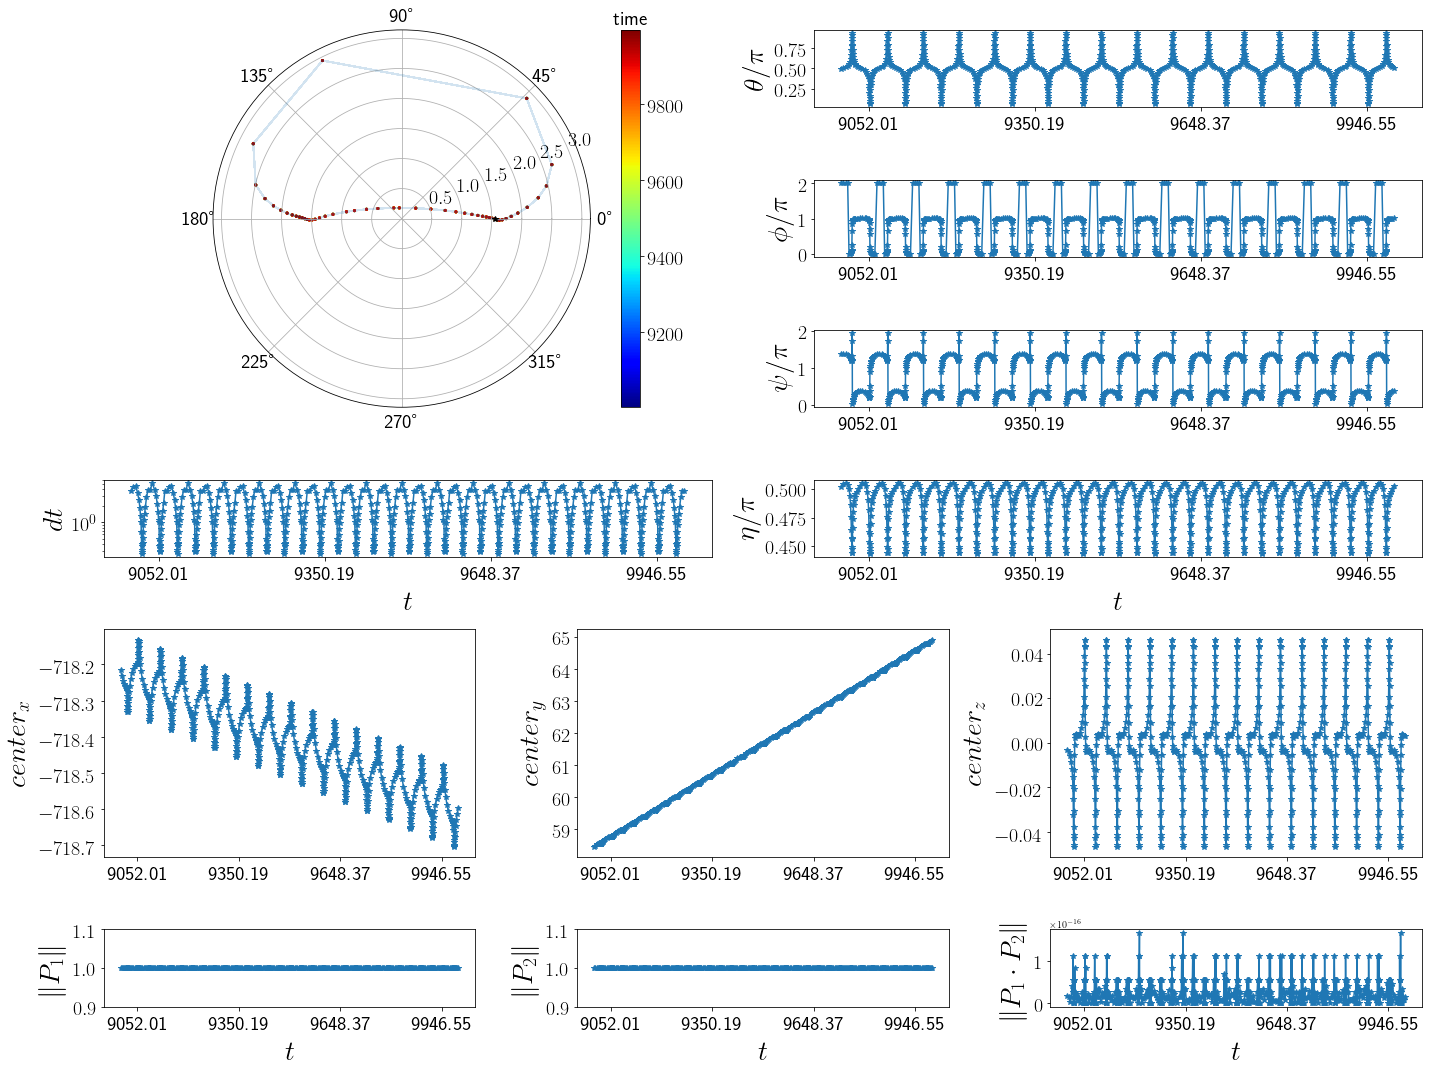

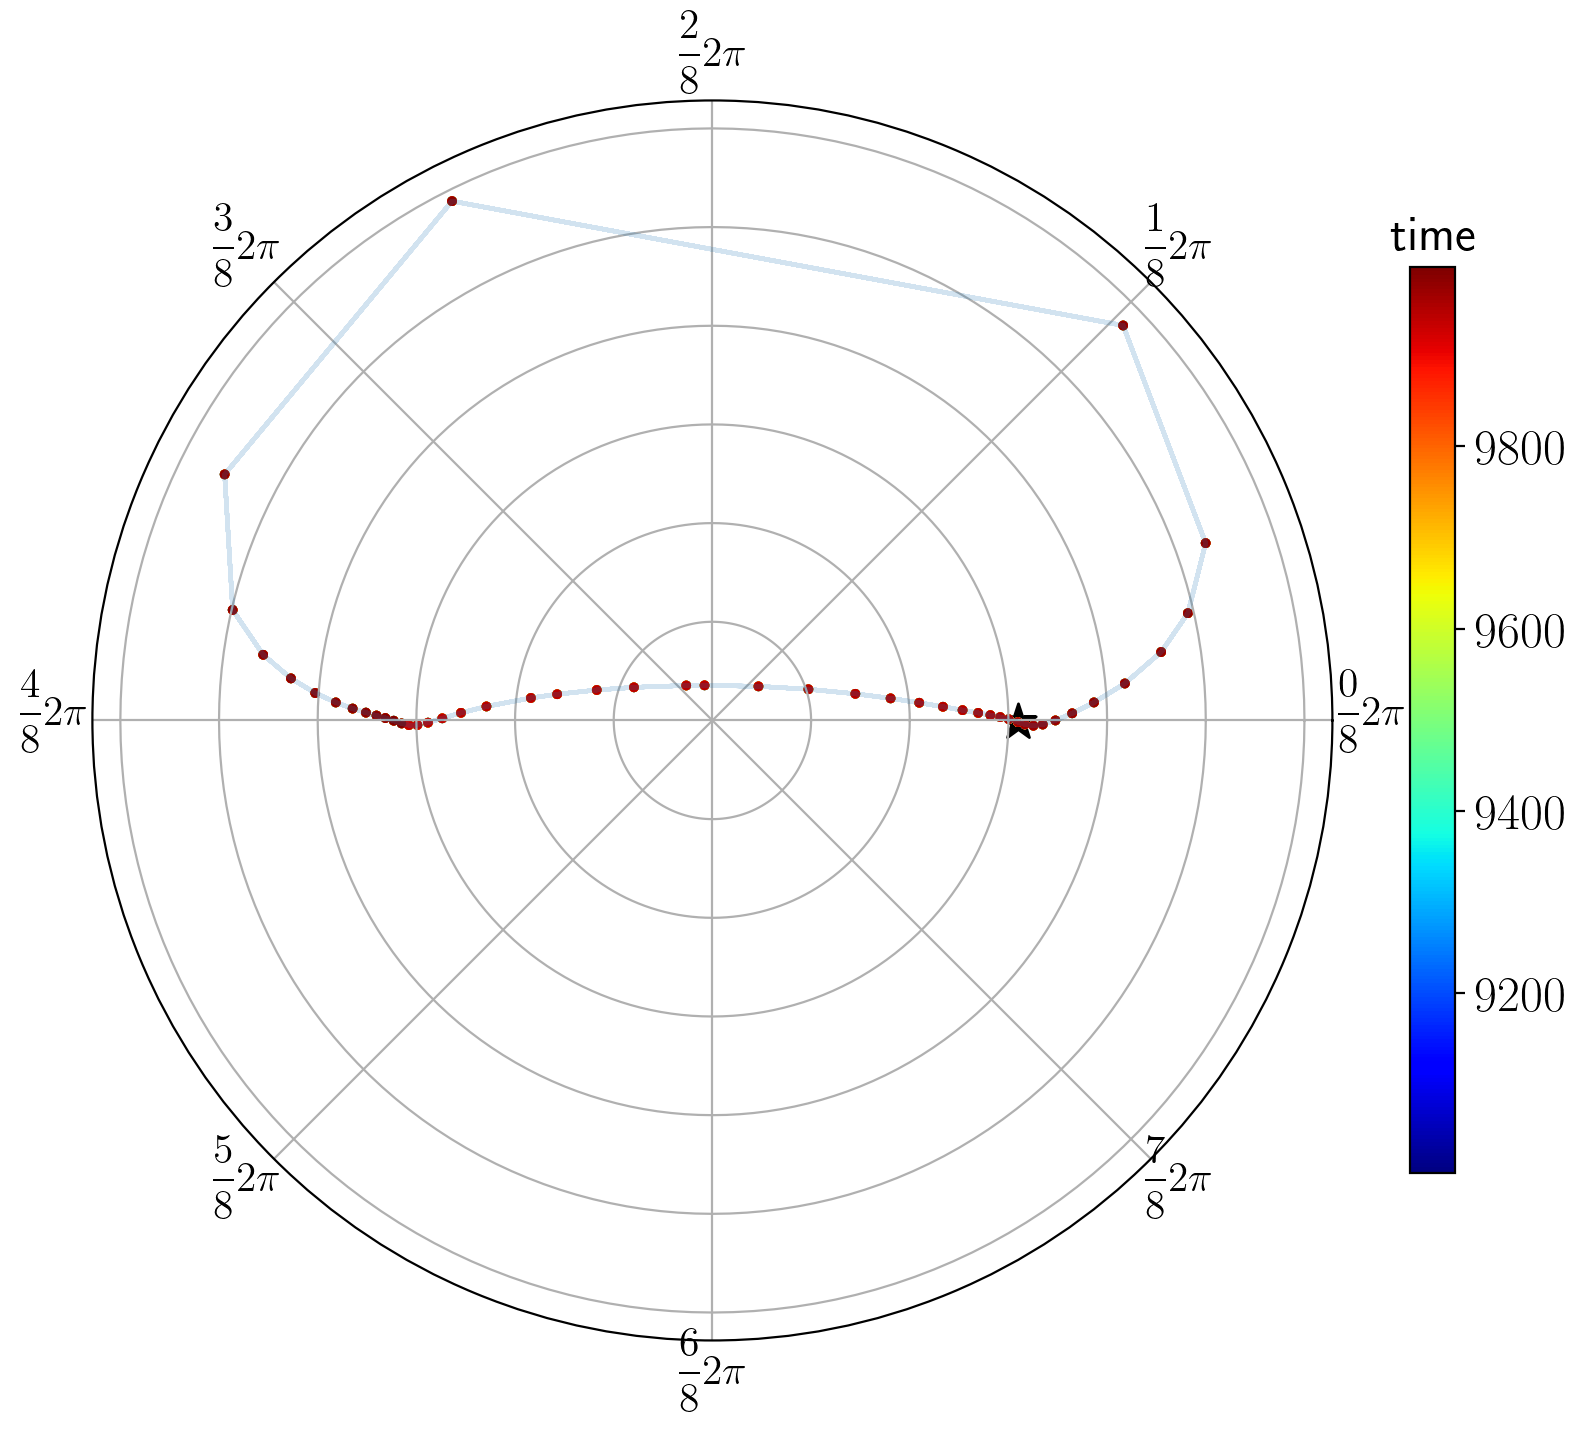

In [355]:
# active ecoli in shear flow, base flow theory, petsc family method 
importlib.reload(spf_tb)
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
t_theta, t_phi, t_psi = 0, 1.714, 0
# t_theta, t_phi, t_psi = 0.3 * np.pi, 1.3 * np.pi, 0
# t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
# t_theta, t_phi, t_psi = 0.692, 0.339, 3.989
max_t = 10000
update_fun = '5bs'
rtol = 1e-6
atol = 1e-9
eval_dt = 0.01
save_every = 1
# table_name = 'ecoC01B05_4tail_baseFlow'
# table_name_mdf = 'ecoC01B05_4tail_baseFlow_mdf'
# table_name = 'ecoB01_baseFlow'
table_name = 'ecoC01B05_baseFlow'
# table_name_mdf = 'ecoB01_baseFlow_mdf'
# table_name = 'hlxC02B05_baseFlow'
# table_name_mdf = 'hlxC02B05_baseFlow_mdf'
# table_name = 'hlxC03B05_baseFlow'
# table_name_mdf = 'hlxC03B05_baseFlow_mdf'
# table_name = 'hlx2_rh11_10.000_ph_20.00_baseFlow'
# table_name_mdf = 'hlx2_rh11_10.000_ph_20.00_baseFlow_mdf'
# table_name = 'hlx2_rh11_1.000_ph_6.67_baseFlow'
# table_name_mdf = 'hlx2_rh11_1.000_ph_6.67_baseFlow_mdf'
# table_name = 'hlxB01_baseFlow2'
# table_name_mdf = 'hlxB01_baseFlow2_mdf'
omega_tail = 0
flow_strength = 1

t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                      rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                      save_every=save_every, table_name=table_name, 
                                      omega_tail=omega_tail, flow_strength=flow_strength)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
tidx = Table_t > 9000
spf_tb.show_table_result(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                         Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every)
# spf_tb.light_show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
#                             Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None)

# t0 = time()
# tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
# Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
#    = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
#                                       rtol=rtol, atol=atol, eval_dt=eval_dt, 
#                                       save_every=save_every, table_name=table_name_mdf, 
#                                       omega_tail=omega_tail, flow_strength=flow_strength)
# t1 = time()
# print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
# print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
# print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
# print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
# spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                          Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# tidx = Table_t > 0
# spf_tb.light_show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
#                             Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None)

/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


True

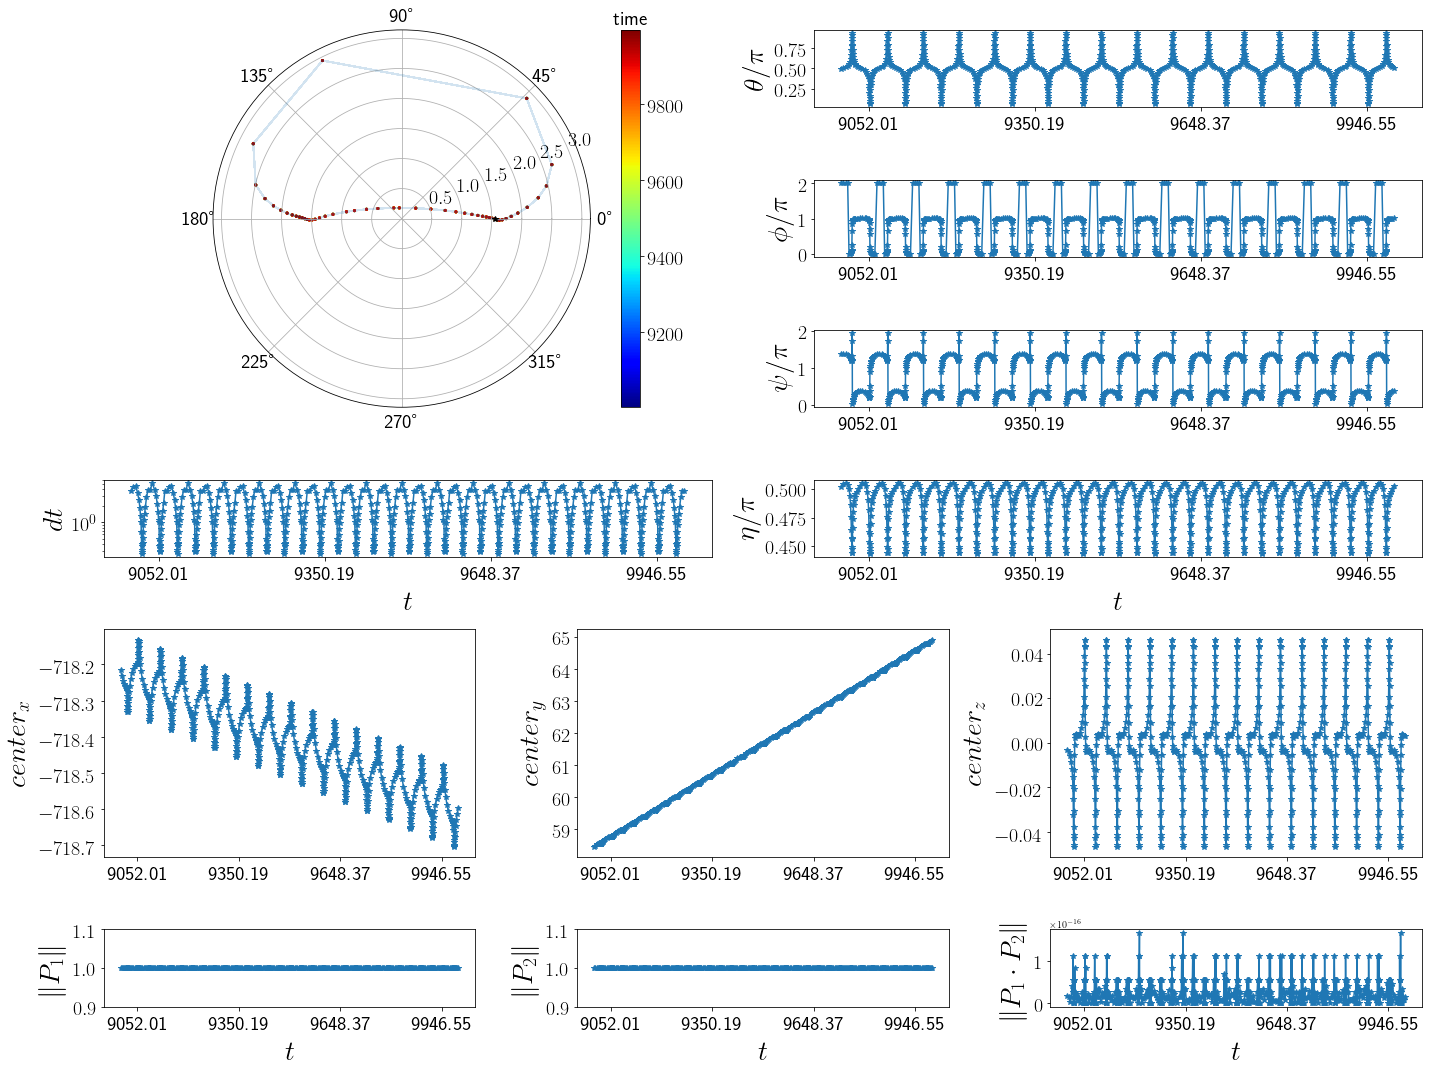

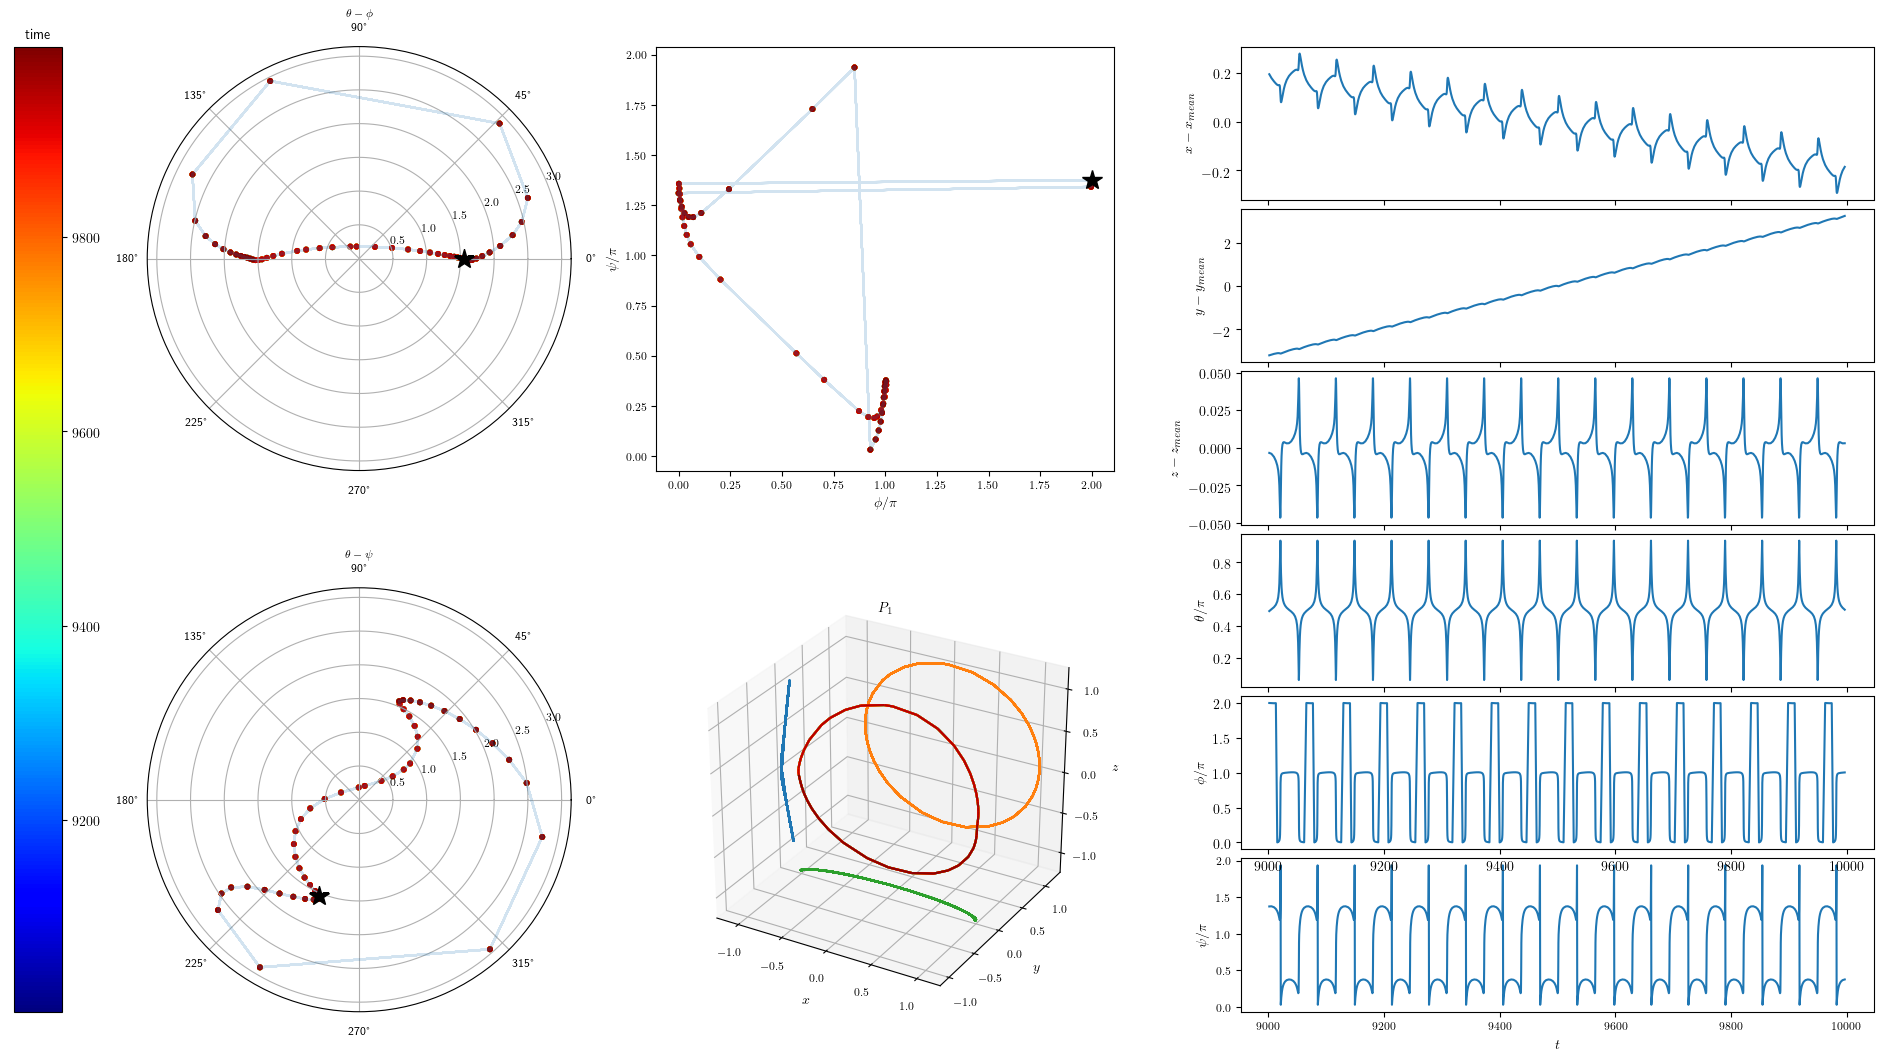

In [356]:
tidx = Table_t > 9000
spf_tb.show_table_result(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                         Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every)
spf_tb.show_table_result_v2(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                         Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], save_every)
# spf_tb.light_show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
#                             Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None)

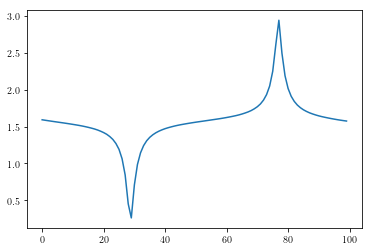

In [363]:
Table_theta2.shape
plt.plot(Table_theta2[-100:])

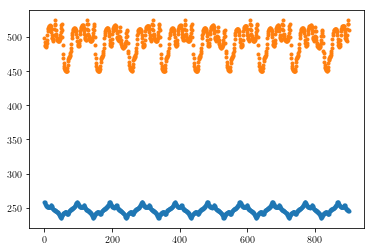

In [365]:
Table_theta2 = spf_tb.get_continue_angle(Table_t[10:], Table_theta[10:])
Table_phi2 = spf_tb.get_continue_angle(Table_t[10:], Table_phi[10:])
t1 = np.correlate(Table_theta2[-100:], Table_theta2[-1000:], mode='valid')
t2 = np.correlate(Table_theta2[-100:], Table_phi2[-1000:], mode='valid')
plt.plot(t1, '.')
plt.plot(t2, '.')


In [369]:
t1

array([ 4.85000000e+02,  5.50000000e+01,  1.35185185e+01,  4.06250000e+00,
        1.00000000e+00, -1.85185185e-01, -6.85131195e-01, -8.98437500e-01,
       -9.80795610e-01, -1.00000000e+00, -9.87978963e-01, -9.60648148e-01,
       -9.26263086e-01, -8.89212828e-01, -8.51851852e-01, -8.15429688e-01,
       -7.80582129e-01, -7.47599451e-01, -7.16576760e-01, -6.87500000e-01,
       -6.60295864e-01, -6.34861007e-01, -6.11079149e-01, -5.88831019e-01,
       -5.68000000e-01, -5.48475193e-01, -5.30152924e-01, -5.12937318e-01,
       -4.96740334e-01, -4.81481481e-01, -4.67087375e-01, -4.53491211e-01,
       -4.40632217e-01, -4.28455119e-01, -4.16909621e-01, -4.05949931e-01,
       -3.95534322e-01, -3.85624727e-01, -3.76186382e-01, -3.67187500e-01,
       -3.58598976e-01, -3.50394126e-01, -3.42548455e-01, -3.35039444e-01,
       -3.27846365e-01, -3.20950111e-01, -3.14333048e-01, -3.07978877e-01,
       -3.01872519e-01, -2.96000000e-01, -2.90348358e-01, -2.84905553e-01,
       -2.79660391e-01, -

In [377]:
np.log10(0.5773502691896257)

-0.23856062735983125

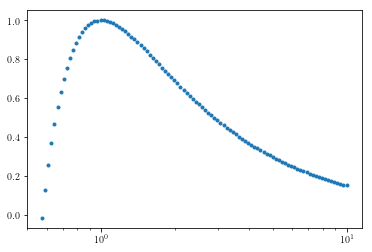

In [378]:
r = 10 ** np.linspace(-0.24, 1, 100)
# r = np.linspace(0.4, 10, 100)
t1 = (1 - 3 * r ** 2) / (2 * r ** 3)
plt.semilogx(r, -t1, '.')


In [16]:
# # dbg ShearFlowPetsc4nPsiObj
# importlib.reload(spf_tb)
# t0 = time()
# # t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, np.random.sample(1)[0] * 2 * np.pi
# t_theta, t_phi, t_psi = 0, 1.714, 0
# # t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
# max_t = 100
# update_fun = '5bs'
# rtol = 1e-9
# atol = 1e-12
# eval_dt = 0.01
# save_every = 1
# table_sim='ecoC01B05_tao1_wm10'
# table_cal = 'ecoC01B05_baseFlow'
# omega_tail = 10
# flow_strength = 1

# # table method 
# tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
# norm = tnorm
# ini_psi = t_psi
# ini_t=0
# P0, P20, tcenter, problem = spf_tb.do_calculate_prepare(norm)
# ecoli_kwargs = spf_tb.do_ecoli_kwargs(tcenter, P0, P20, ini_psi, omega_tail, table_sim)
# obj_sim = jm.TablePetsc4nPsiEcoli(**ecoli_kwargs)

# # base flow method
# P0, P20, tcenter, problem = spf_tb.do_calculate_prepare(norm)
# obj_kwargs = spf_tb.do_ecoli_kwargs(tcenter, P0, P20, ini_psi, omega_tail, table_cal,
#                              name='ShearFlowPetsc4nPsi', flow_strength=flow_strength)
# obj_cal = jm.ShearFlowPetsc4nPsiObj(**obj_kwargs)

# t_theta, t_phi, t_psi = np.random.sample(1)[0] * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
# # t_theta, t_phi, t_psi = 1.1780972450961724, 2.061670178918302, 1.963495
# u_sim = obj_sim.intp_U_fun(t_theta, t_phi, t_psi)
# u_cal = obj_cal.calc_U_fun(t_theta, t_phi, t_psi)
# with np.printoptions(linewidth=120, precision=10):
#     print(t_theta, t_phi, t_psi)
#     print(u_sim)
#     print(u_cal)
#     print(u_sim - u_cal)

1.7770918439976053 1.1004170763733305 5.381274707487395
[ 2.9113829354e-02  3.4068570278e-02  4.3876386487e-03 -3.1445212371e+00 -6.1220154467e+00  1.6309040252e+00]
[ 2.9082867100e-02  3.4072725673e-02  4.3929119469e-03 -3.1449180052e+00 -6.1227894050e+00  1.6310523921e+00]
[ 3.0962253818e-05 -4.1553942296e-06 -5.2732982094e-06  3.9676814824e-04  7.7395823490e-04 -1.4836686187e-04]


In [5]:
wx = -1.31816782e-03
wy = -1.23482706e-03
wz = -7.57091305e-01
# fun_theory_theta = lambda t: np.pi / 2 + wx / (1 + wz) + (wy * np.sin((1 + wz) * t) - wx * np.cos((1 + wz) * t)) / (1 + wz)
# fun_theory_psi = lambda t: (1 + wz) * t % (2 * np.pi)
t1 = 'th0 + (2*wx*Cos[ps0])/(1 + wz) - (wx*Cos[ps0])/((1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wz*Cos[ps0])/((1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*Cos[ps0 + z + wz*z])/(1 + wz) - (wx^2*Cot[th0])/(4*(1 + wz)^3) - (wy^2*Cot[th0])/(4*(1 + wz)^3) - (wx^2*wz*Cot[th0])/(4*(1 + wz)^3) - (wy^2*wz*Cot[th0])/(4*(1 + wz)^3) + (3*wx^2*Cot[th0])/(4*(1 + wz)^2) + (3*wy^2*Cot[th0])/(4*(1 + wz)^2) - (wx^2*Cot[th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Cot[th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Cot[th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Cot[th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Cot[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cot[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^2) + (wy^2*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^2) + (wx^2*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Cos[2*ps0 - th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[2*ps0 - th0]*Csc[th0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[2*ps0 - th0]*Csc[th0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^2) + (wy^2*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^2) + (wx^2*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Cos[2*ps0 + th0]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[2*ps0 + th0]*Csc[th0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[2*ps0 + th0]*Csc[th0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) - (wy^2*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) - (wx^2*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Cos[2*ps0 - th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) - (wy^2*Cos[th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) + (wx^2*Cos[th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Cos[th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Cos[th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) - (wy^2*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)^2) - (wx^2*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Cos[2*ps0 + th0 + z + wz*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3) + (wy^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3) + (wx^2*wz*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3) + (wy^2*wz*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3) - (3*wx^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^2) - (3*wy^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^2) + (wx^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Cos[th0 - (1 + wz)*z]*Csc[th0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Cos[2*ps0 - th0 + 2*(1 + wz)*z]*Csc[th0])/(8*(1 + wz)^2) + (wy^2*Cos[2*ps0 - th0 + 2*(1 + wz)*z]*Csc[th0])/(8*(1 + wz)^2) - (wx^2*Cos[2*ps0 + th0 + 2*(1 + wz)*z]*Csc[th0])/(8*(1 + wz)^2) + (wy^2*Cos[2*ps0 + th0 + 2*(1 + wz)*z]*Csc[th0])/(8*(1 + wz)^2) - (5*wx^3*Cos[ps0]*Csc[th0]^2)/(16*(1 + wz)^3) - (5*wx*wy^2*Cos[ps0]*Csc[th0]^2)/(16*(1 + wz)^3) - (3*wx^3*Cos[ps0]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy^2*Cos[ps0]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (5*wx^3*Cos[3*ps0]*Csc[th0]^2)/(48*(1 + wz)^3) + (5*wx*wy^2*Cos[3*ps0]*Csc[th0]^2)/(16*(1 + wz)^3) + (3*wx^3*Cos[3*ps0]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (9*wx*wy^2*Cos[3*ps0]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^3*Cos[ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) + (3*wx*wy^2*Cos[ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx^3*Cos[ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Cos[ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Cos[3*ps0 - 2*th0]*Csc[th0]^2)/(96*(1 + wz)^3) + (wx*wy^2*Cos[3*ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) + (wx^3*Cos[3*ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy^2*Cos[3*ps0 - 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^3*Cos[ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) + (3*wx*wy^2*Cos[ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx^3*Cos[ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Cos[ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Cos[3*ps0 + 2*th0]*Csc[th0]^2)/(96*(1 + wz)^3) + (wx*wy^2*Cos[3*ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3) + (wx^3*Cos[3*ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy^2*Cos[3*ps0 + 2*th0]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^3*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) + (3*wx*wy^2*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx^2*wy*z*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) + (wy^3*z*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) + (wx^2*wy*wz*z*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) + (wy^3*wz*z*Cos[ps0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) - (wx^3*Cos[3*ps0 + z + wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) + (3*wx*wy^2*Cos[3*ps0 + z + wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (3*wx^3*Cos[3*ps0 + z + wz*z]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (9*wx*wy^2*Cos[3*ps0 + z + wz*z]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*z*Cos[ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wy^3*z*Cos[ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx^2*wy*wz*z*Cos[ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wy^3*wz*z*Cos[ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx^3*Cos[3*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3) + (3*wx*wy^2*Cos[3*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx^3*Cos[3*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Cos[3*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*z*Cos[ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wy^3*z*Cos[ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx^2*wy*wz*z*Cos[ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wy^3*wz*z*Cos[ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx^3*Cos[3*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3) + (3*wx*wy^2*Cos[3*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx^3*Cos[3*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Cos[3*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Cos[ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx*wy^2*Cos[ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) + (wx^3*Cos[3*ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (3*wx*wy^2*Cos[3*ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx^3*Cos[3*ps0 + 3*z + 3*wz*z]*Csc[th0]^2)/(12*(1 + wz)^3) + (wx*wy^2*Cos[3*ps0 + 3*z + 3*wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) - (wx^3*Cos[ps0 - (1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx*wy^2*Cos[ps0 - (1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) + (3*wx^3*Cos[ps0 - (1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Cos[ps0 - (1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Cos[ps0 - 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx*wy^2*Cos[ps0 - 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3) + (wx^3*Cos[ps0 - 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy^2*Cos[ps0 - 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Cos[ps0 + 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3) - (wx*wy^2*Cos[ps0 + 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3) + (wx^3*Cos[ps0 + 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy^2*Cos[ps0 + 2*th0 - (1 + wz)*z]*Csc[th0]^2)/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Cos[3*ps0 + 2*(1 + wz)*z]*Csc[th0]^2)/(4*(1 + wz)^3) - (3*wx*wy^2*Cos[3*ps0 + 2*(1 + wz)*z]*Csc[th0]^2)/(4*(1 + wz)^3) - (wx^3*Cos[ps0 - 2*th0 + 2*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx*wy^2*Cos[ps0 - 2*th0 + 2*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) + (wx^3*Cos[3*ps0 - 2*th0 + 2*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (3*wx*wy^2*Cos[3*ps0 - 2*th0 + 2*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx^3*Cos[3*ps0 - 2*th0 + 3*(1 + wz)*z]*Csc[th0]^2)/(48*(1 + wz)^3) + (wx*wy^2*Cos[3*ps0 - 2*th0 + 3*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (wx^3*Cos[3*ps0 + 2*th0 + 3*(1 + wz)*z]*Csc[th0]^2)/(48*(1 + wz)^3) + (wx*wy^2*Cos[3*ps0 + 2*th0 + 3*(1 + wz)*z]*Csc[th0]^2)/(16*(1 + wz)^3) - (2*wy*Sin[ps0])/(1 + wz) + (wy*Sin[ps0])/((1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy*wz*Sin[ps0])/((1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (5*wx^2*wy*Csc[th0]^2*Sin[ps0])/(16*(1 + wz)^3) + (5*wy^3*Csc[th0]^2*Sin[ps0])/(16*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[ps0])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^3*Csc[th0]^2*Sin[ps0])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (5*wx^2*wy*Csc[th0]^2*Sin[3*ps0])/(16*(1 + wz)^3) - (5*wy^3*Csc[th0]^2*Sin[3*ps0])/(48*(1 + wz)^3) - (9*wx^2*wy*Csc[th0]^2*Sin[3*ps0])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^3*Csc[th0]^2*Sin[3*ps0])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wy*Csc[th0]^2*Sin[ps0 - 2*th0])/(32*(1 + wz)^3) - (3*wy^3*Csc[th0]^2*Sin[ps0 - 2*th0])/(32*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[ps0 - 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Csc[th0]^2*Sin[ps0 - 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0])/(32*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0])/(96*(1 + wz)^3) - (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Csc[th0]*Sin[2*ps0 - th0])/(2*(1 + wz)^2) - (wx*wy*Csc[th0]*Sin[2*ps0 - th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*wz*Csc[th0]*Sin[2*ps0 - th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Csc[th0]*Sin[2*ps0 - th0])/(4*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Csc[th0]*Sin[2*ps0 + th0])/(2*(1 + wz)^2) - (wx*wy*Csc[th0]*Sin[2*ps0 + th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*wz*Csc[th0]*Sin[2*ps0 + th0])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Csc[th0]*Sin[2*ps0 + th0])/(4*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wy*Csc[th0]^2*Sin[ps0 + 2*th0])/(32*(1 + wz)^3) - (3*wy^3*Csc[th0]^2*Sin[ps0 + 2*th0])/(32*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[ps0 + 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Csc[th0]^2*Sin[ps0 + 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0])/(32*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0])/(96*(1 + wz)^3) - (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy*Sin[ps0 + z + wz*z])/(1 + wz) - (3*wx^2*wy*Csc[th0]^2*Sin[ps0 + z + wz*z])/(8*(1 + wz)^3) - (3*wy^3*Csc[th0]^2*Sin[ps0 + z + wz*z])/(8*(1 + wz)^3) + (wx^3*z*Csc[th0]^2*Sin[ps0 + z + wz*z])/(4*(1 + wz)^3) + (wx*wy^2*z*Csc[th0]^2*Sin[ps0 + z + wz*z])/(4*(1 + wz)^3) + (wx^3*wz*z*Csc[th0]^2*Sin[ps0 + z + wz*z])/(4*(1 + wz)^3) + (wx*wy^2*wz*z*Csc[th0]^2*Sin[ps0 + z + wz*z])/(4*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + z + wz*z])/(16*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 + z + wz*z])/(16*(1 + wz)^3) + (9*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + z + wz*z])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wy^3*Csc[th0]^2*Sin[3*ps0 + z + wz*z])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*z*Csc[th0]^2*Sin[ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx*wy^2*z*Csc[th0]^2*Sin[ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx^3*wz*z*Csc[th0]^2*Sin[ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx*wy^2*wz*z*Csc[th0]^2*Sin[ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0 + z + wz*z])/(32*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0 + z + wz*z])/(32*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0 + z + wz*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0 + z + wz*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*Csc[th0]*Sin[2*ps0 - th0 + z + wz*z])/(1 + wz)^2 + (wx*wy*Csc[th0]*Sin[2*ps0 - th0 + z + wz*z])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*wz*Csc[th0]*Sin[2*ps0 - th0 + z + wz*z])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*Csc[th0]*Sin[2*ps0 + th0 + z + wz*z])/(1 + wz)^2 + (wx*wy*Csc[th0]*Sin[2*ps0 + th0 + z + wz*z])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*wz*Csc[th0]*Sin[2*ps0 + th0 + z + wz*z])/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*z*Csc[th0]^2*Sin[ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx*wy^2*z*Csc[th0]^2*Sin[ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx^3*wz*z*Csc[th0]^2*Sin[ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3) - (wx*wy^2*wz*z*Csc[th0]^2*Sin[ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0 + z + wz*z])/(32*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0 + z + wz*z])/(32*(1 + wz)^3) + (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0 + z + wz*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0 + z + wz*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Csc[th0]^2*Sin[ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) - (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 3*z + 3*wz*z])/(4*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 + 3*z + 3*wz*z])/(12*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[ps0 - (1 + wz)*z])/(16*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[ps0 - (1 + wz)*z])/(16*(1 + wz)^3) - (3*wx^2*wy*Csc[th0]^2*Sin[ps0 - (1 + wz)*z])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wy^3*Csc[th0]^2*Sin[ps0 - (1 + wz)*z])/(16*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Csc[th0]^2*Sin[ps0 - 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[ps0 - 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3) - (wx^2*wy*Csc[th0]^2*Sin[ps0 - 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Csc[th0]^2*Sin[ps0 - 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Csc[th0]^2*Sin[ps0 + 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[ps0 + 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3) - (wx^2*wy*Csc[th0]^2*Sin[ps0 + 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Csc[th0]^2*Sin[ps0 + 2*th0 - (1 + wz)*z])/(32*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*(1 + wz)*z])/(4*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*(1 + wz)*z])/(4*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[ps0 - 2*th0 + 2*(1 + wz)*z])/(16*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[ps0 - 2*th0 + 2*(1 + wz)*z])/(16*(1 + wz)^3) - (3*wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0 + 2*(1 + wz)*z])/(16*(1 + wz)^3) + (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0 + 2*(1 + wz)*z])/(16*(1 + wz)^3) + (wx*wy*Csc[th0]*Sin[2*ps0 - th0 + 2*(1 + wz)*z])/(4*(1 + wz)^2) + (wx*wy*Csc[th0]*Sin[2*ps0 + th0 + 2*(1 + wz)*z])/(4*(1 + wz)^2) + (wx^2*wy*Csc[th0]^2*Sin[3*ps0 - 2*th0 + 3*(1 + wz)*z])/(16*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 - 2*th0 + 3*(1 + wz)*z])/(48*(1 + wz)^3) + (wx^2*wy*Csc[th0]^2*Sin[3*ps0 + 2*th0 + 3*(1 + wz)*z])/(16*(1 + wz)^3) - (wy^3*Csc[th0]^2*Sin[3*ps0 + 2*th0 + 3*(1 + wz)*z])/(48*(1 + wz)^3)'
t2 = 'ps0 + z + wz*z + (wx^2*z)/(2*(1 + wz)*(-1 + Cos[2*th0])) + (wy^2*z)/(2*(1 + wz)*(-1 + Cos[2*th0])) - (wy*Cos[ps0 - th0]*Csc[th0])/(1 + wz) + (wy*Cos[ps0 - th0]*Csc[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy*wz*Cos[ps0 - th0]*Csc[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy*Cos[ps0 + th0]*Csc[th0])/(1 + wz) + (wy*Cos[ps0 + th0]*Csc[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy*wz*Cos[ps0 + th0]*Csc[th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy*Cos[ps0 - th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)) + (wy*Cos[ps0 + th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)) + (wx^2*z*Csc[th0]^2)/(2*(1 + wz)) + (wy^2*z*Csc[th0]^2)/(2*(1 + wz)) + (3*wx*wy*Cos[2*ps0]*Csc[th0]^2)/(4*(1 + wz)^3) + (3*wx*wy*wz*Cos[2*ps0]*Csc[th0]^2)/(4*(1 + wz)^3) + (3*wx*wy*Cos[2*ps0]*Csc[th0]^2)/(4*(1 + wz)^2) - (3*wx*wy*Cos[2*ps0]*Csc[th0]^2)/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy*wz*Cos[2*ps0]*Csc[th0]^2)/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy*Cos[2*ps0]*Csc[th0]^2)/(4*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*wz*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(8*(1 + wz)^2) - (wx*wy*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*wz*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Cos[2*ps0 - 2*th0]*Csc[th0]^2)/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*z*Cos[2*th0]*Csc[th0]^2)/(4*(1 + wz)) - (wy^2*z*Cos[2*th0]*Csc[th0]^2)/(4*(1 + wz)) + (wx*wy*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*wz*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(8*(1 + wz)^2) - (wx*wy*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*wz*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*Cos[2*ps0 + 2*th0]*Csc[th0]^2)/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy*Cos[2*ps0 + z + wz*z]*Csc[th0]^2)/(1 + wz)^2 + (3*wx*wy*Cos[2*ps0 + z + wz*z]*Csc[th0]^2)/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy*wz*Cos[2*ps0 + z + wz*z]*Csc[th0]^2)/(2*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*Cos[2*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(2*(1 + wz)^2) + (wx*wy*Cos[2*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*wz*Cos[2*ps0 - 2*th0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy*Cos[2*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(2*(1 + wz)^2) + (wx*wy*Cos[2*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy*wz*Cos[2*ps0 + 2*th0 + z + wz*z]*Csc[th0]^2)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy*Cos[2*ps0 + 2*z + 2*wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) - (3*wx*wy*wz*Cos[2*ps0 + 2*z + 2*wz*z]*Csc[th0]^2)/(4*(1 + wz)^3) + (3*wx*wy*Cos[2*ps0 + 2*z + 2*wz*z]*Csc[th0]^2)/(2*(1 + wz)^2) - (wx*wy*Cos[2*ps0 - 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx*wy*wz*Cos[2*ps0 - 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*Cos[2*ps0 - 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(4*(1 + wz)^2) - (wx*wy*Cos[2*ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) - (wx*wy*wz*Cos[2*ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(8*(1 + wz)^3) + (wx*wy*Cos[2*ps0 + 2*th0 + 2*z + 2*wz*z]*Csc[th0]^2)/(4*(1 + wz)^2) - (wx^2*wy*Cos[ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wx^2*wy*Cos[ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[3*ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 - 3*th0]*Csc[th0]^3)/(192*(1 + wz)^3) - (3*wx^2*wy*Cos[3*ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Cos[3*ps0 - 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wx^2*wy*Cos[ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (11*wy^3*Cos[ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3) + (13*wx^2*wy*Cos[ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (13*wy^3*Cos[ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^2*wy*Cos[3*ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (33*wx^2*wy*Cos[3*ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (11*wy^3*Cos[3*ps0 - th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wx^2*wy*Cos[ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (11*wy^3*Cos[ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3) + (13*wx^2*wy*Cos[ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (13*wy^3*Cos[ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^2*wy*Cos[3*ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (33*wx^2*wy*Cos[3*ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (11*wy^3*Cos[3*ps0 + th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*Cos[ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wx^2*wy*Cos[ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[3*ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 + 3*th0]*Csc[th0]^3)/(192*(1 + wz)^3) - (3*wx^2*wy*Cos[3*ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Cos[3*ps0 + 3*th0]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*z*Cos[ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx*wy^2*z*Cos[ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx^3*wz*z*Cos[ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx*wy^2*wz*z*Cos[ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (3*wx^2*wy*Cos[3*ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (3*wx^2*wy*Cos[3*ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[3*ps0 - 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3) + (wy^3*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3) - (wx^2*wy*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*z*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx*wy^2*z*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx^3*wz*z*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx*wy^2*wz*z*Cos[ps0 - th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (57*wx^2*wy*Cos[3*ps0 - th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (19*wy^3*Cos[3*ps0 - th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (33*wx^2*wy*Cos[3*ps0 - th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wy^3*Cos[3*ps0 - th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3) + (wy^3*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3) - (wx^2*wy*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*z*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx*wy^2*z*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx^3*wz*z*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (wx*wy^2*wz*z*Cos[ps0 + th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (57*wx^2*wy*Cos[3*ps0 + th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (19*wy^3*Cos[3*ps0 + th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (33*wx^2*wy*Cos[3*ps0 + th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wy^3*Cos[3*ps0 + th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*z*Cos[ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx*wy^2*z*Cos[ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx^3*wz*z*Cos[ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) - (wx*wy^2*wz*z*Cos[ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(16*(1 + wz)^3) + (3*wx^2*wy*Cos[3*ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[3*ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (3*wx^2*wy*Cos[3*ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^3*Cos[3*ps0 + 3*th0 + z + wz*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[3*ps0 - 3*th0 + 3*z + 3*wz*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wy^3*Cos[3*ps0 - 3*th0 + 3*z + 3*wz*z]*Csc[th0]^3)/(96*(1 + wz)^3) + (wx^2*wy*Cos[3*ps0 + 3*th0 + 3*z + 3*wz*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wy^3*Cos[3*ps0 + 3*th0 + 3*z + 3*wz*z]*Csc[th0]^3)/(96*(1 + wz)^3) - (wx^2*wy*Cos[ps0 - 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[ps0 - 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (wx^2*wy*Cos[ps0 - 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Cos[ps0 - 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wy*Cos[ps0 - th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (3*wy^3*Cos[ps0 - th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (3*wx^2*wy*Cos[ps0 - th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^3*Cos[ps0 - th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wy*Cos[ps0 + th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (3*wy^3*Cos[ps0 + th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (3*wx^2*wy*Cos[ps0 + th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^3*Cos[ps0 + th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*Cos[ps0 + 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) - (wy^3*Cos[ps0 + 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3) + (wx^2*wy*Cos[ps0 + 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^3*Cos[ps0 + 3*th0 - (1 + wz)*z]*Csc[th0]^3)/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*Cos[ps0 - 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (wy^3*Cos[ps0 - 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (3*wx^2*wy*Cos[3*ps0 - 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (wy^3*Cos[3*ps0 - 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wx^2*wy*Cos[ps0 - th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wy^3*Cos[ps0 - th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (45*wx^2*wy*Cos[3*ps0 - th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (15*wy^3*Cos[3*ps0 - th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wx^2*wy*Cos[ps0 + th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (wy^3*Cos[ps0 + th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (45*wx^2*wy*Cos[3*ps0 + th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (15*wy^3*Cos[3*ps0 + th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (wx^2*wy*Cos[ps0 + 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (wy^3*Cos[ps0 + 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (3*wx^2*wy*Cos[3*ps0 + 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (wy^3*Cos[3*ps0 + 3*th0 + 2*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (15*wx^2*wy*Cos[3*ps0 - th0 + 3*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (5*wy^3*Cos[3*ps0 - th0 + 3*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (15*wx^2*wy*Cos[3*ps0 + th0 + 3*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) - (5*wy^3*Cos[3*ps0 + th0 + 3*(1 + wz)*z]*Csc[th0]^3)/(32*(1 + wz)^3) + (3*wx^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^3) - (3*wy^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^3) + (3*wx^2*wz*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^3) - (3*wy^2*wz*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^3) + (3*wx^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^2) - (3*wy^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^2) - (3*wx^2*Csc[th0]^2*Sin[2*ps0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^2*Csc[th0]^2*Sin[2*ps0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*wz*Csc[th0]^2*Sin[2*ps0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wy^2*wz*Csc[th0]^2*Sin[2*ps0])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wy^2*Csc[th0]^2*Sin[2*ps0])/(8*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Csc[th0]^3*Sin[ps0 - 3*th0])/(64*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 - 3*th0])/(64*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 - 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Csc[th0]^3*Sin[ps0 - 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0])/(192*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0])/(64*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^3) - (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^3) + (wx^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^3) - (wy^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^3) + (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^2) - (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^2) - (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0])/(16*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*Csc[th0]*Sin[ps0 - th0])/(1 + wz) + (wx*Csc[th0]*Sin[ps0 - th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wz*Csc[th0]*Sin[ps0 - th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wx^3*Csc[th0]^3*Sin[ps0 - th0])/(64*(1 + wz)^3) - (11*wx*wy^2*Csc[th0]^3*Sin[ps0 - th0])/(64*(1 + wz)^3) + (13*wx^3*Csc[th0]^3*Sin[ps0 - th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (13*wx*wy^2*Csc[th0]^3*Sin[ps0 - th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Csc[th0]^3*Sin[3*ps0 - th0])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0])/(64*(1 + wz)^3) - (11*wx^3*Csc[th0]^3*Sin[3*ps0 - th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (33*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^3) - (wy^2*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^3) - (wx^2*wz*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^3) - (wy^2*wz*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^3) + (wx^2*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^2) + (wy^2*Csc[th0]^2*Sin[2*th0])/(8*(1 + wz)^2) - (wx*Csc[th0]*Sin[ps0 + th0])/(1 + wz) + (wx*Csc[th0]*Sin[ps0 + th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wz*Csc[th0]*Sin[ps0 + th0])/(2*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (11*wx^3*Csc[th0]^3*Sin[ps0 + th0])/(64*(1 + wz)^3) - (11*wx*wy^2*Csc[th0]^3*Sin[ps0 + th0])/(64*(1 + wz)^3) + (13*wx^3*Csc[th0]^3*Sin[ps0 + th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (13*wx*wy^2*Csc[th0]^3*Sin[ps0 + th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Csc[th0]^3*Sin[3*ps0 + th0])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0])/(64*(1 + wz)^3) - (11*wx^3*Csc[th0]^3*Sin[3*ps0 + th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (33*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^3) - (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^3) + (wx^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^3) - (wy^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^3) + (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^2) - (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^2) - (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0])/(16*(1 + wz)^2*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Csc[th0]^3*Sin[ps0 + 3*th0])/(64*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 + 3*th0])/(64*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 + 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Csc[th0]^3*Sin[ps0 + 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0])/(192*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0])/(64*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Csc[th0]^2*Sin[(1 + wz)*z])/(2*(1 + wz)^2) - (wy^2*Csc[th0]^2*Sin[(1 + wz)*z])/(2*(1 + wz)^2) + (wx^2*Csc[th0]^2*Sin[(1 + wz)*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Csc[th0]^2*Sin[(1 + wz)*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Csc[th0]^2*Sin[(1 + wz)*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Csc[th0]^2*Sin[(1 + wz)*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(2*(1 + wz)^2) + (3*wy^2*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(2*(1 + wz)^2) + (3*wx^2*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wy^2*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx^2*wz*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wy^2*wz*Csc[th0]^2*Sin[2*ps0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*z*Csc[th0]^3*Sin[ps0 - 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wy^3*z*Csc[th0]^3*Sin[ps0 - 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wx^2*wy*wz*z*Csc[th0]^3*Sin[ps0 - 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wy^3*wz*z*Csc[th0]^3*Sin[ps0 - 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0 + z + wz*z])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0 + z + wz*z])/(64*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(4*(1 + wz)^2) + (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(4*(1 + wz)^2) + (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*Csc[th0]*Sin[ps0 - th0 + z + wz*z])/(2*(1 + wz)) + (wx^3*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(4*(1 + wz)^3) + (wx*wy^2*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(4*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*z*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(16*(1 + wz)^3) - (wy^3*z*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(16*(1 + wz)^3) - (wx^2*wy*wz*z*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(16*(1 + wz)^3) - (wy^3*wz*z*Csc[th0]^3*Sin[ps0 - th0 + z + wz*z])/(16*(1 + wz)^3) + (19*wx^3*Csc[th0]^3*Sin[3*ps0 - th0 + z + wz*z])/(64*(1 + wz)^3) - (57*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0 + z + wz*z])/(64*(1 + wz)^3) + (11*wx^3*Csc[th0]^3*Sin[3*ps0 - th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (33*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*Csc[th0]*Sin[ps0 + th0 + z + wz*z])/(2*(1 + wz)) + (wx^3*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(4*(1 + wz)^3) + (wx*wy^2*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(4*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx*wy^2*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(4*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wy*z*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(16*(1 + wz)^3) - (wy^3*z*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(16*(1 + wz)^3) - (wx^2*wy*wz*z*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(16*(1 + wz)^3) - (wy^3*wz*z*Csc[th0]^3*Sin[ps0 + th0 + z + wz*z])/(16*(1 + wz)^3) + (19*wx^3*Csc[th0]^3*Sin[3*ps0 + th0 + z + wz*z])/(64*(1 + wz)^3) - (57*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0 + z + wz*z])/(64*(1 + wz)^3) + (11*wx^3*Csc[th0]^3*Sin[3*ps0 + th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (33*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(4*(1 + wz)^2) + (wy^2*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(4*(1 + wz)^2) - (wx^2*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*wz*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Csc[th0]^2*Sin[2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(4*(1 + wz)^2) + (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(4*(1 + wz)^2) + (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wy^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0 + z + wz*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wy*z*Csc[th0]^3*Sin[ps0 + 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wy^3*z*Csc[th0]^3*Sin[ps0 + 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wx^2*wy*wz*z*Csc[th0]^3*Sin[ps0 + 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wy^3*wz*z*Csc[th0]^3*Sin[ps0 + 3*th0 + z + wz*z])/(16*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0 + z + wz*z])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0 + z + wz*z])/(64*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0 + z + wz*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^2*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(8*(1 + wz)^3) + (3*wy^2*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(8*(1 + wz)^3) - (3*wx^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(8*(1 + wz)^3) + (3*wy^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(8*(1 + wz)^3) + (3*wx^2*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(4*(1 + wz)^2) - (3*wy^2*Csc[th0]^2*Sin[2*ps0 + 2*z + 2*wz*z])/(4*(1 + wz)^2) - (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) - (wx^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^2*wz*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wx^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(8*(1 + wz)^2) - (wy^2*Csc[th0]^2*Sin[2*ps0 - 2*th0 + 2*z + 2*wz*z])/(8*(1 + wz)^2) - (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) - (wx^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wy^2*wz*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(16*(1 + wz)^3) + (wx^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(8*(1 + wz)^2) - (wy^2*Csc[th0]^2*Sin[2*ps0 + 2*th0 + 2*z + 2*wz*z])/(8*(1 + wz)^2) + (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0 + 3*z + 3*wz*z])/(96*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0 + 3*z + 3*wz*z])/(32*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0 + 3*z + 3*wz*z])/(96*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0 + 3*z + 3*wz*z])/(32*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 - 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 - 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[ps0 - 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy^2*Csc[th0]^3*Sin[ps0 - 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^3*Csc[th0]^3*Sin[ps0 - th0 - (1 + wz)*z])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[ps0 - th0 - (1 + wz)*z])/(64*(1 + wz)^3) + (3*wx^3*Csc[th0]^3*Sin[ps0 - th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Csc[th0]^3*Sin[ps0 - th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (3*wx^3*Csc[th0]^3*Sin[ps0 + th0 - (1 + wz)*z])/(64*(1 + wz)^3) - (3*wx*wy^2*Csc[th0]^3*Sin[ps0 + th0 - (1 + wz)*z])/(64*(1 + wz)^3) + (3*wx^3*Csc[th0]^3*Sin[ps0 + th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (3*wx*wy^2*Csc[th0]^3*Sin[ps0 + th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3) + (wy^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3) + (wx^2*wz*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3) + (wy^2*wz*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3) - (3*wx^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^2) - (3*wy^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^2) + (wx^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^2*wz*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wy^2*wz*Csc[th0]^2*Sin[2*th0 - (1 + wz)*z])/(8*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) - (wx^3*Csc[th0]^3*Sin[ps0 + 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 + 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[ps0 + 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx*wy^2*Csc[th0]^3*Sin[ps0 + 3*th0 - (1 + wz)*z])/(64*(1 + wz)^3*((1 + wz)^(-2) + (2*wz)/(1 + wz)^2 + wz^2/(1 + wz)^2)) + (wx^3*Csc[th0]^3*Sin[ps0 - 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (wx*wy^2*Csc[th0]^3*Sin[ps0 - 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[3*ps0 - 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 - th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 - th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (15*wx^3*Csc[th0]^3*Sin[3*ps0 - th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (45*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[ps0 + th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx*wy^2*Csc[th0]^3*Sin[ps0 + th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (15*wx^3*Csc[th0]^3*Sin[3*ps0 + th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (45*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (wx^3*Csc[th0]^3*Sin[ps0 + 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (wx*wy^2*Csc[th0]^3*Sin[ps0 + 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) - (wx^3*Csc[th0]^3*Sin[3*ps0 + 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (3*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + 3*th0 + 2*(1 + wz)*z])/(32*(1 + wz)^3) + (5*wx^3*Csc[th0]^3*Sin[3*ps0 - th0 + 3*(1 + wz)*z])/(32*(1 + wz)^3) - (15*wx*wy^2*Csc[th0]^3*Sin[3*ps0 - th0 + 3*(1 + wz)*z])/(32*(1 + wz)^3) + (5*wx^3*Csc[th0]^3*Sin[3*ps0 + th0 + 3*(1 + wz)*z])/(32*(1 + wz)^3) - (15*wx*wy^2*Csc[th0]^3*Sin[3*ps0 + th0 + 3*(1 + wz)*z])/(32*(1 + wz)^3)'
# t1 = 'th0 + (wx*Cos[ps0])/(1 + wz) - (wx*Cos[ps0 + z + wz*z])/(1 + wz) - (wy*Sin[ps0])/(1 + wz) + (wy*Sin[ps0 + z + wz*z])/(1 + wz)'
# t2 = 'ps0 + z + wz*z - (wy*Cos[ps0 - th0]*Csc[th0])/(2*(1 + wz)) - (wy*Cos[ps0 + th0]*Csc[th0])/(2*(1 + wz)) + (wy*Cos[ps0 - th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)) + (wy*Cos[ps0 + th0 + z + wz*z]*Csc[th0])/(2*(1 + wz)) - (wx*Csc[th0]*Sin[ps0 - th0])/(2*(1 + wz)) - (wx*Csc[th0]*Sin[ps0 + th0])/(2*(1 + wz)) + (wx*Csc[th0]*Sin[ps0 - th0 + z + wz*z])/(2*(1 + wz)) + (wx*Csc[th0]*Sin[ps0 + th0 + z + wz*z])/(2*(1 + wz))'
sym_list = (sympy.Symbol('z'), sympy.Symbol('th0'), sympy.Symbol('ps0'), sympy.Symbol('wx'), sympy.Symbol('wy'), sympy.Symbol('wz'))
t12 = mathematica.mathematica(t1)
t13 = sympy.lambdify(sym_list, t12, [{'cot': spf.mycot, 'csc': spf.mycsc, 'sec': spf.mysec}, 'numpy', ])
t22 = mathematica.mathematica(t2)
t23 = sympy.lambdify(sym_list, t22, [{'cot': spf.mycot, 'csc': spf.mycsc, 'sec': spf.mysec}, 'numpy', ])
fun_theory_theta = lambda t: t13(t, t_theta, t_psi, wx, wy, wz)
fun_theory_psi = lambda t: t23(t, t_theta, t_psi, wx, wy, wz) % (2 * np.pi)

# print_latex(t12)
# print()
# print_latex(t22)

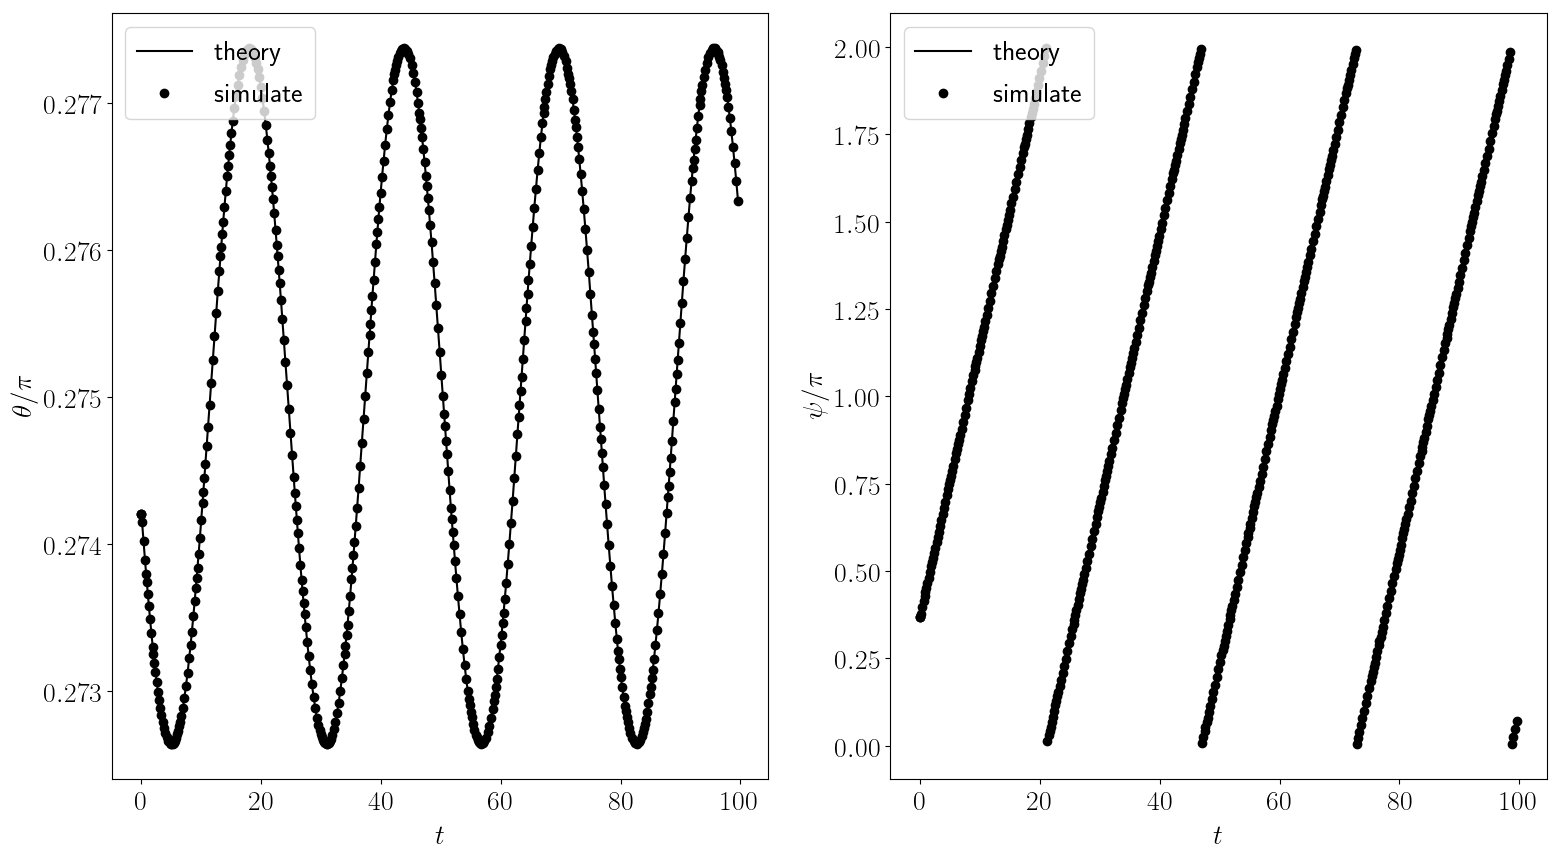

In [190]:
figsize = np.array((16, 9)) * 1
dpi = 100

fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi)
for axi, ty, tfun, ylabel in zip(axs.ravel(), (Table_theta, Table_psi), (fun_theory_theta, fun_theory_psi), 
                                 ('$\\theta / \pi$', '$\\psi / \pi$')):
    t1 = tfun(Table_t)
    axi.plot(Table_t[0], t1[0] / np.pi, '-k', label='theory')
    axi.plot(Table_t[:-1], ty[:-1] / np.pi, 'ok', label='simulate')
    for i0, i1 in spf_tb.separate_angle_idx(t1):
        axi.plot(Table_t[i0:i1], t1[i0:i1] / np.pi, '-k')
    axi.set_xlabel('$t$')
    axi.set_ylabel(ylabel)
    axi.legend(loc='upper left')
plt.tight_layout()

In [36]:
np.arctan(1)

0.7853981633974483

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')



last norm:  1.63330090104367 , 3.1686673849581735 , 4.601479154325094
do_calculate_helix_Petsc4n: run 1000 loops/times using 71.676157s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 71.7s


True

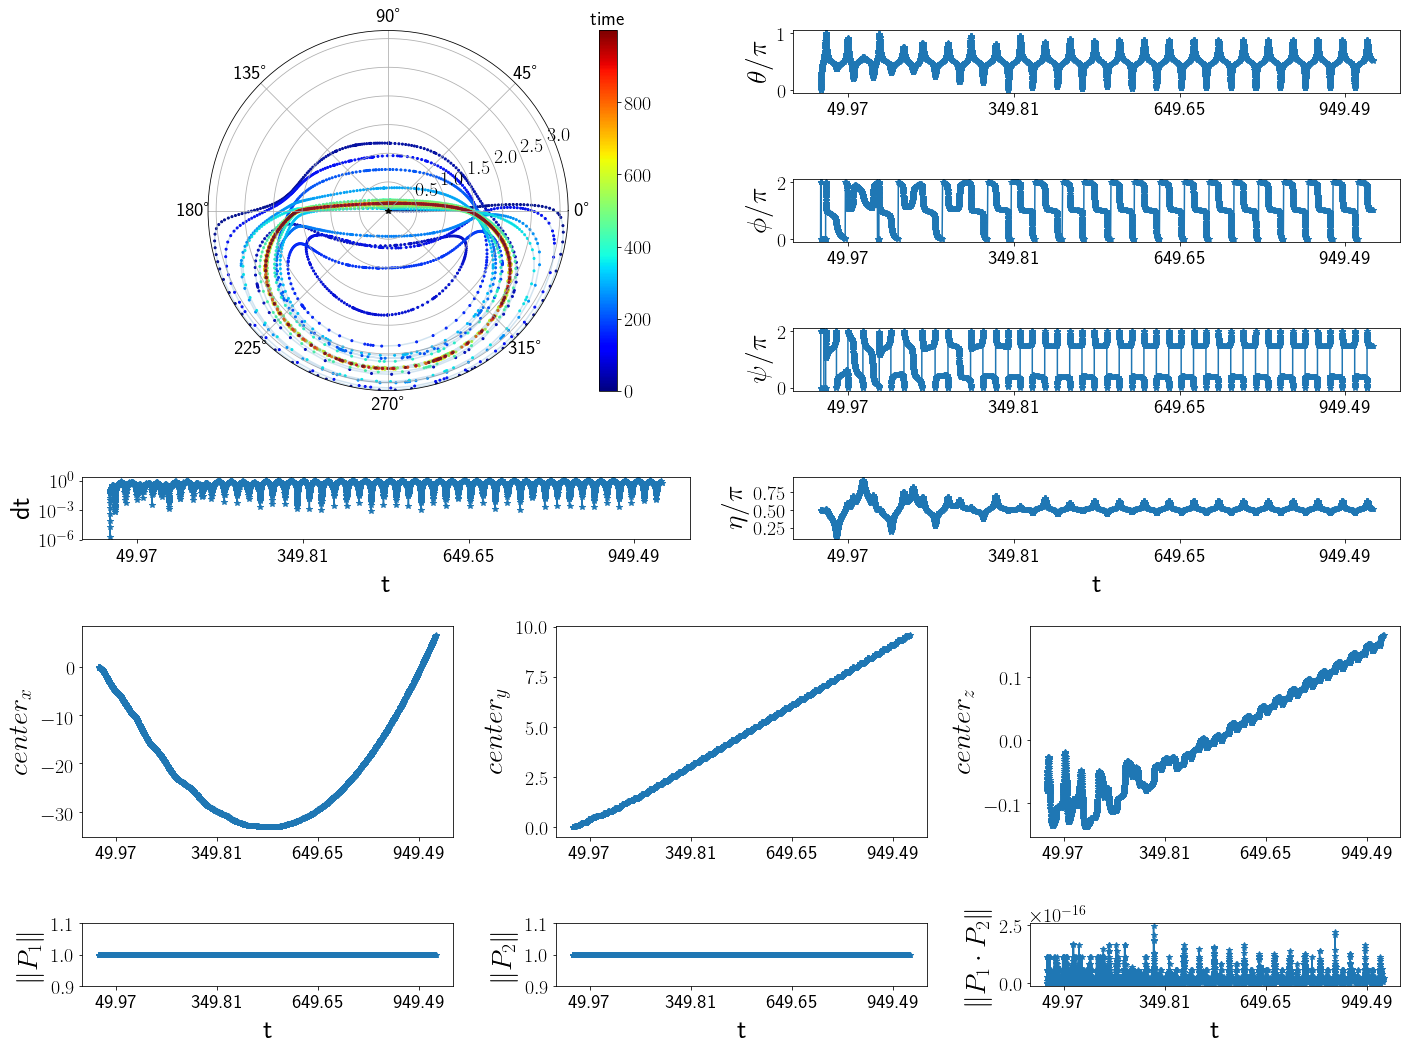

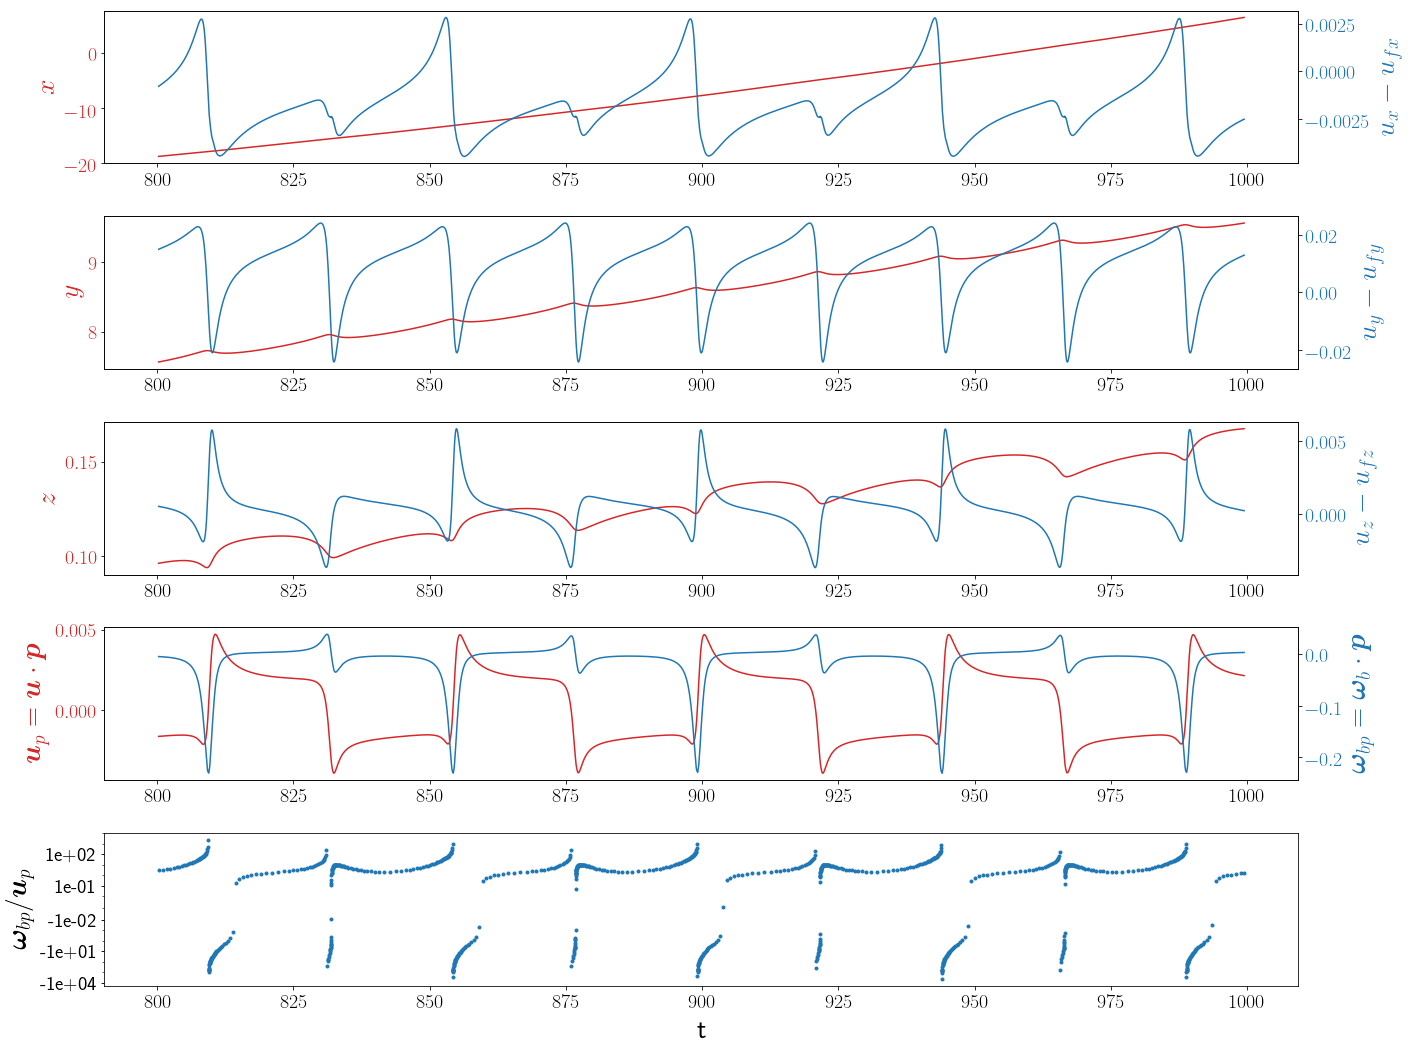

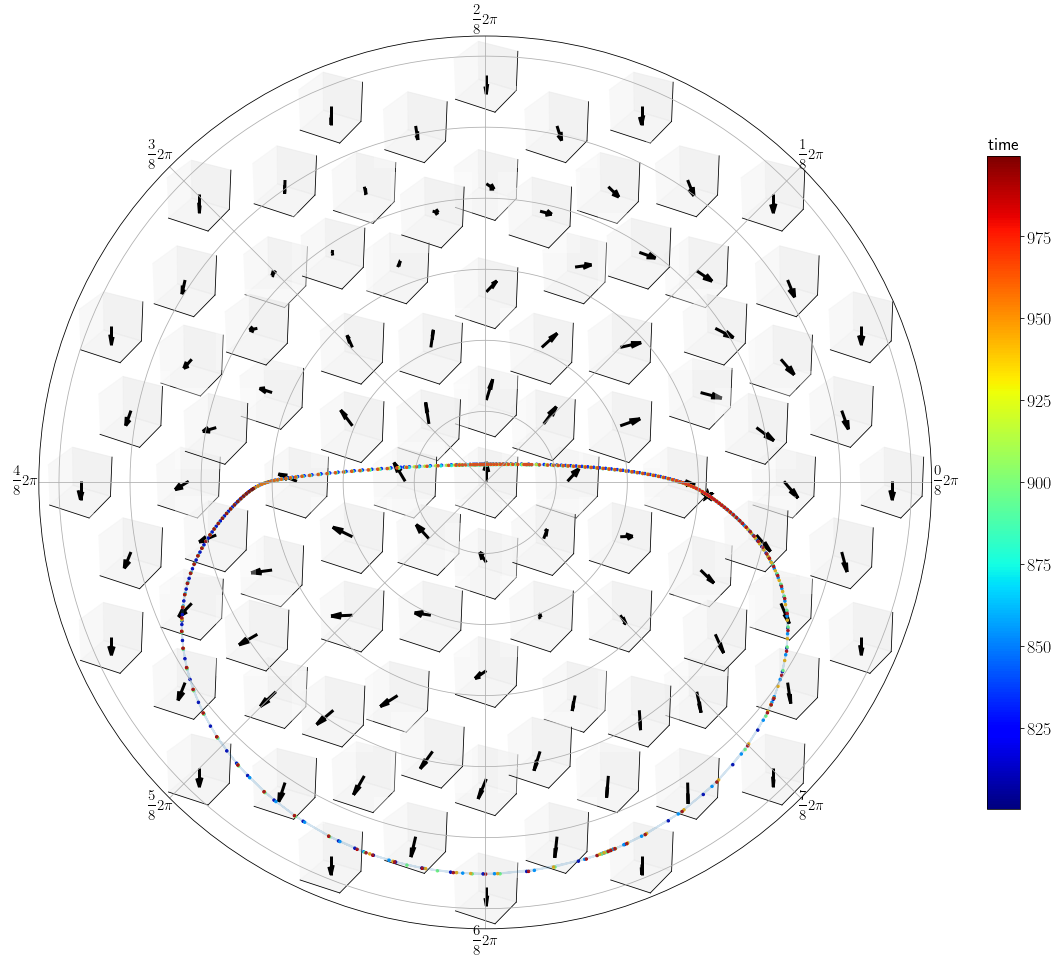

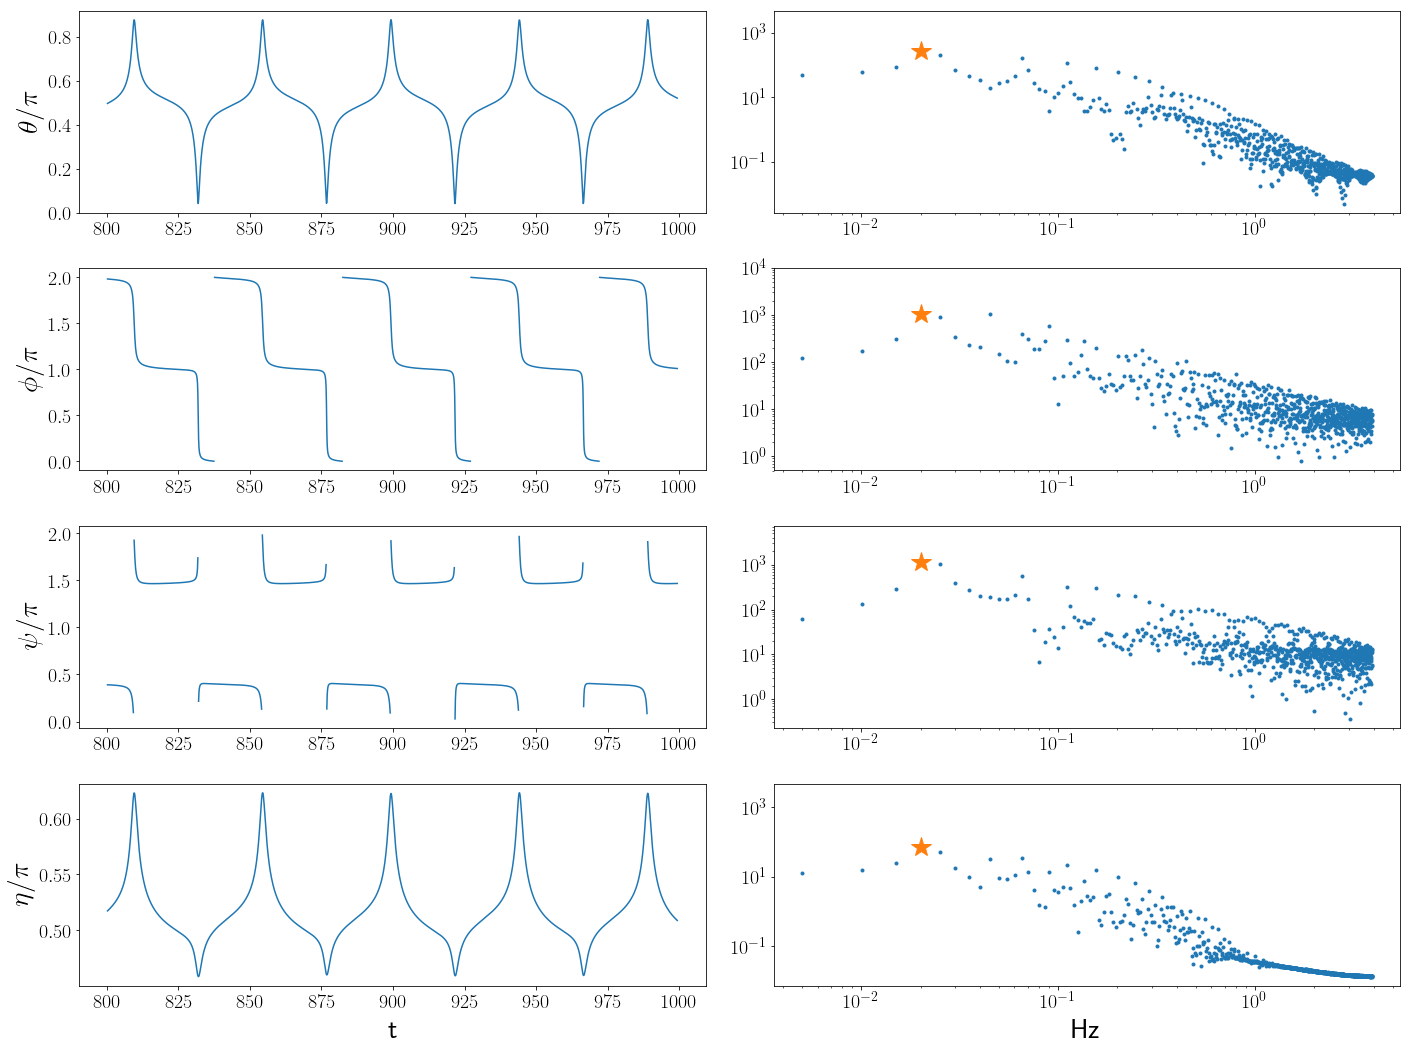

In [31]:
# rotlet helix petsc family quaternion method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 1000
update_fun='5bs'
rtol=1e-9
atol=1e-12
eval_dt = 0.01
save_every = 1
table_name='ecoC01B00_T-0.111'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, eval_dt=eval_dt, ini_t=0,
                                       save_every=save_every, table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))

spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)
tidx = Table_t > 800
spf_tb.show_center_X(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                     Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], table_name,
                     move_z=False, planeShearRate=np.array((1, 0, 0)), fig=None, resampling=False, resampling_fct=2)
spf_tb.show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                     Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None,
                      show_back_direction=True)
spf_tb.show_theta_phi_psi_eta(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                              Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                              fig=None, resampling_fct=2, fft_full_mode=False)


/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')
/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


True

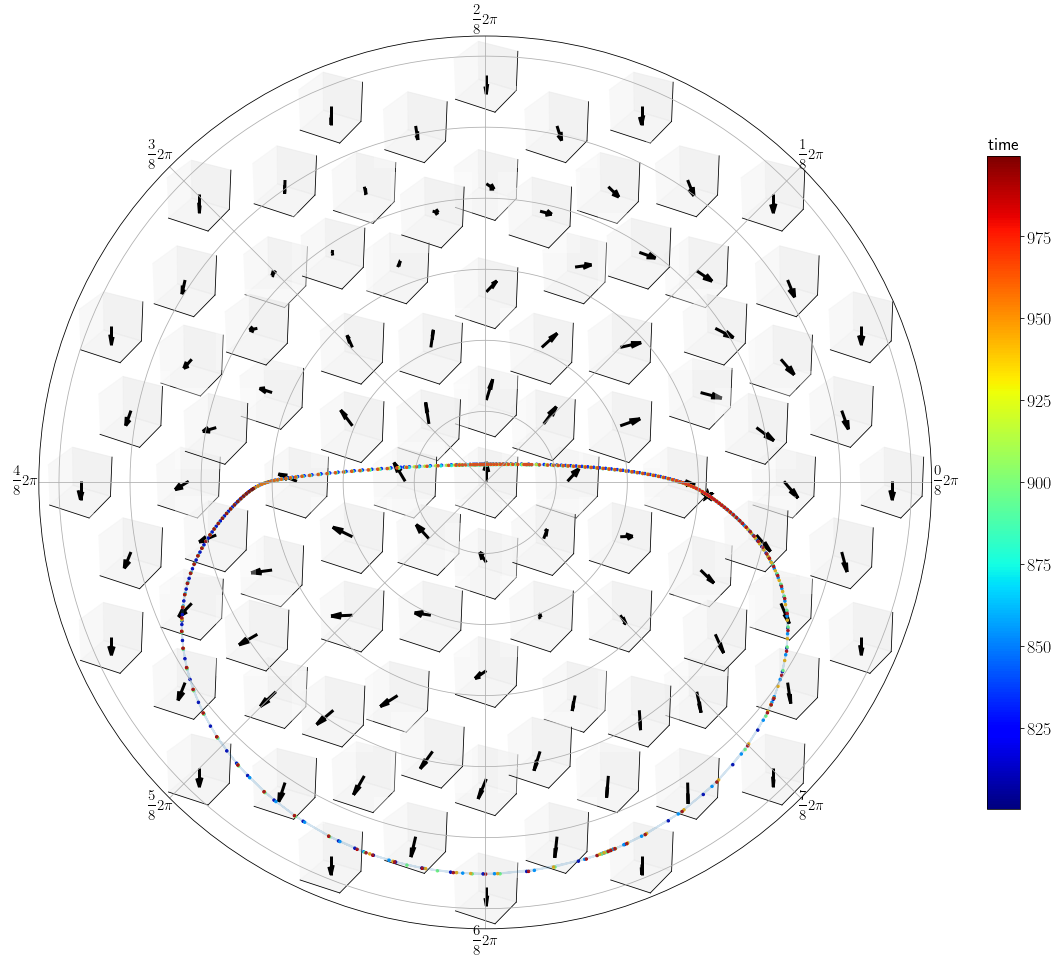

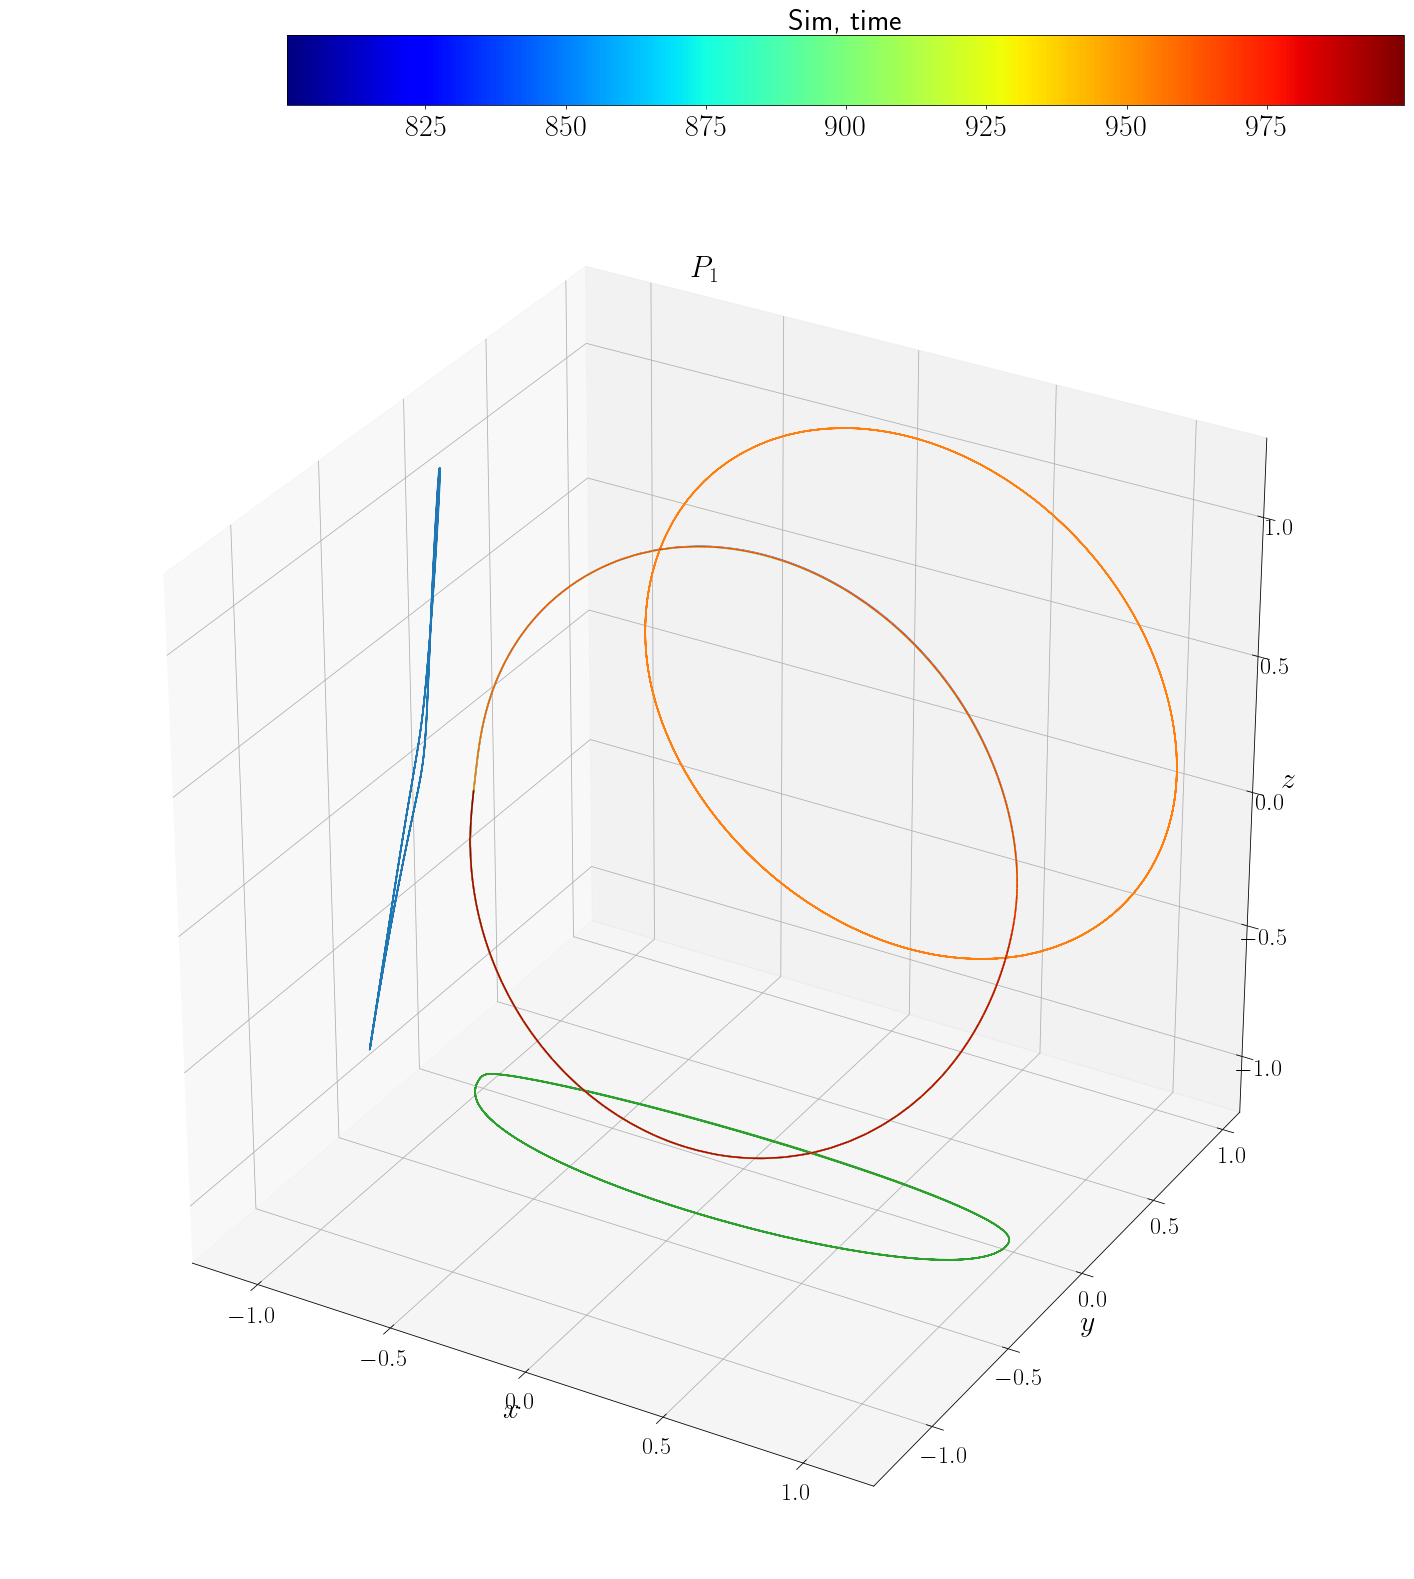

In [42]:
importlib.reload(spf_tb)
tidx = Table_t > 800
spf_tb.show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                      Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None,
                      show_back_direction=True)


init \theta=1.320, \phi=2.801, \psi=0.364, 
last \theta=1.265, \phi=3.141, \psi=2.566, 
do_calculate_ecoli_Petsc4nPsi: run 30000 loops/times using 496.803833s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-03 496.8s



init \theta=1.320, \phi=2.801, \psi=0.364, 
last \theta=1.363, \phi=0.002, \psi=4.131, 
do_calculate_ecoli_Petsc4n: run 30000 loops/times using 158.904077s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-03 158.9s


True

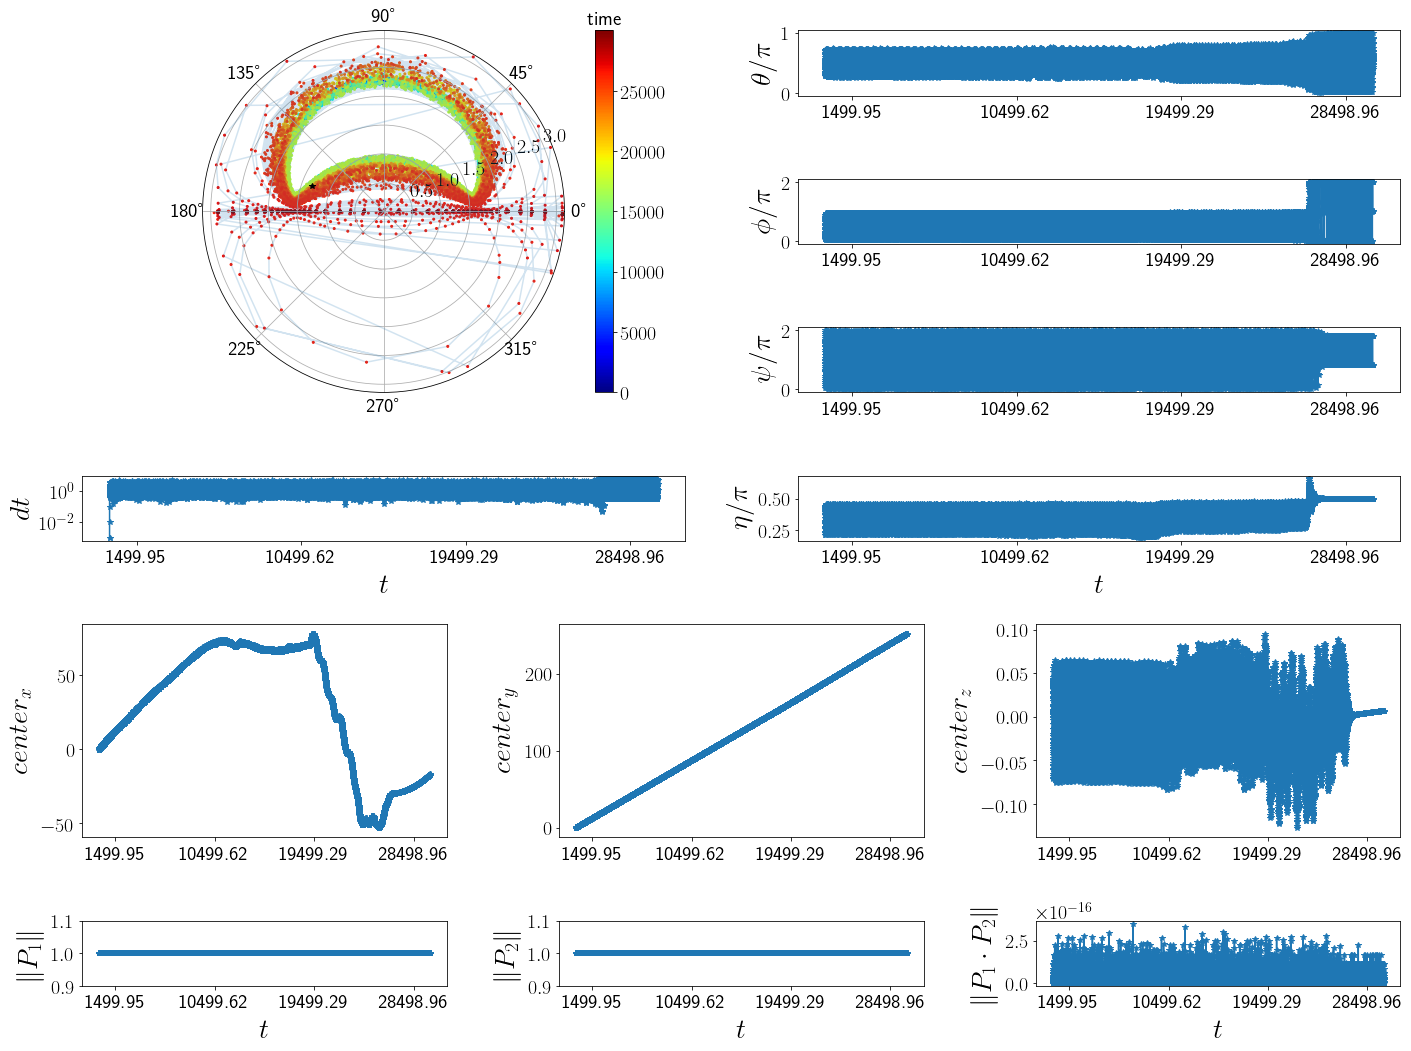

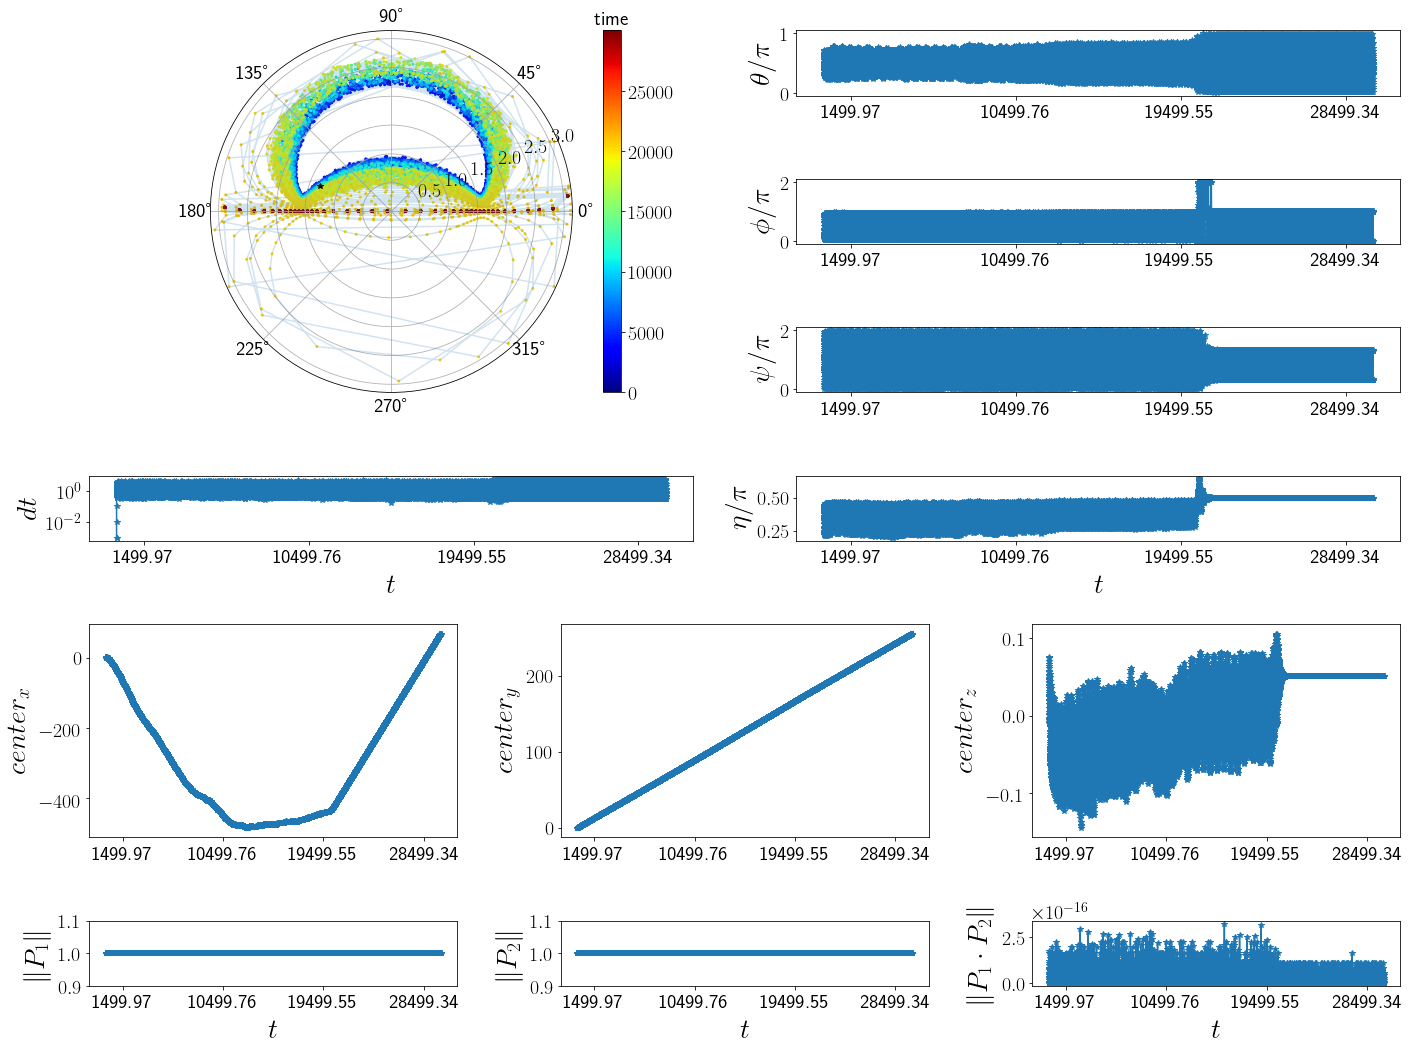

In [121]:
# passive helix petsc family method 
importlib.reload(spf_tb)
importlib.reload(jm)

# t_theta, t_phi, t_psi = np.pi * 0.5, 0, 0
# t_theta, t_phi, t_psi = np.random.sample(1)[0] * 1 * np.pi, np.random.sample(1)[0] * 2 * np.pi, np.random.sample(1)[0] * 2 * np.pi
# t_theta, t_phi, t_psi = 1.611, 3.142, 0.994
# t_theta, t_phi, t_psi = 0, 0, 0
# t_theta, t_phi, t_psi = 2.029, 2.007, 1.156
t_theta, t_phi, t_psi = 1.320, 2.801, 0.364
max_t = 30000
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = 1
table_name1 = 'hlxB01_tau1a'
table_name2 = 'hlxB01_baseFlow'
omega_tail = 0
flow_strength = 1

t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta\
   = spf_tb.do_calculate_helix_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                       eval_dt=eval_dt, save_every=save_every, 
                                       table_name=table_name1, omega_tail=omega_tail)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4nPsi', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# spf_tb.show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, 
#                       show_back_direction=False)

t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                      rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                      save_every=save_every, table_name=table_name2, 
                                      omega_tail=omega_tail, flow_strength=flow_strength)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# spf_tb.show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, 
#                       show_back_direction=False)

True

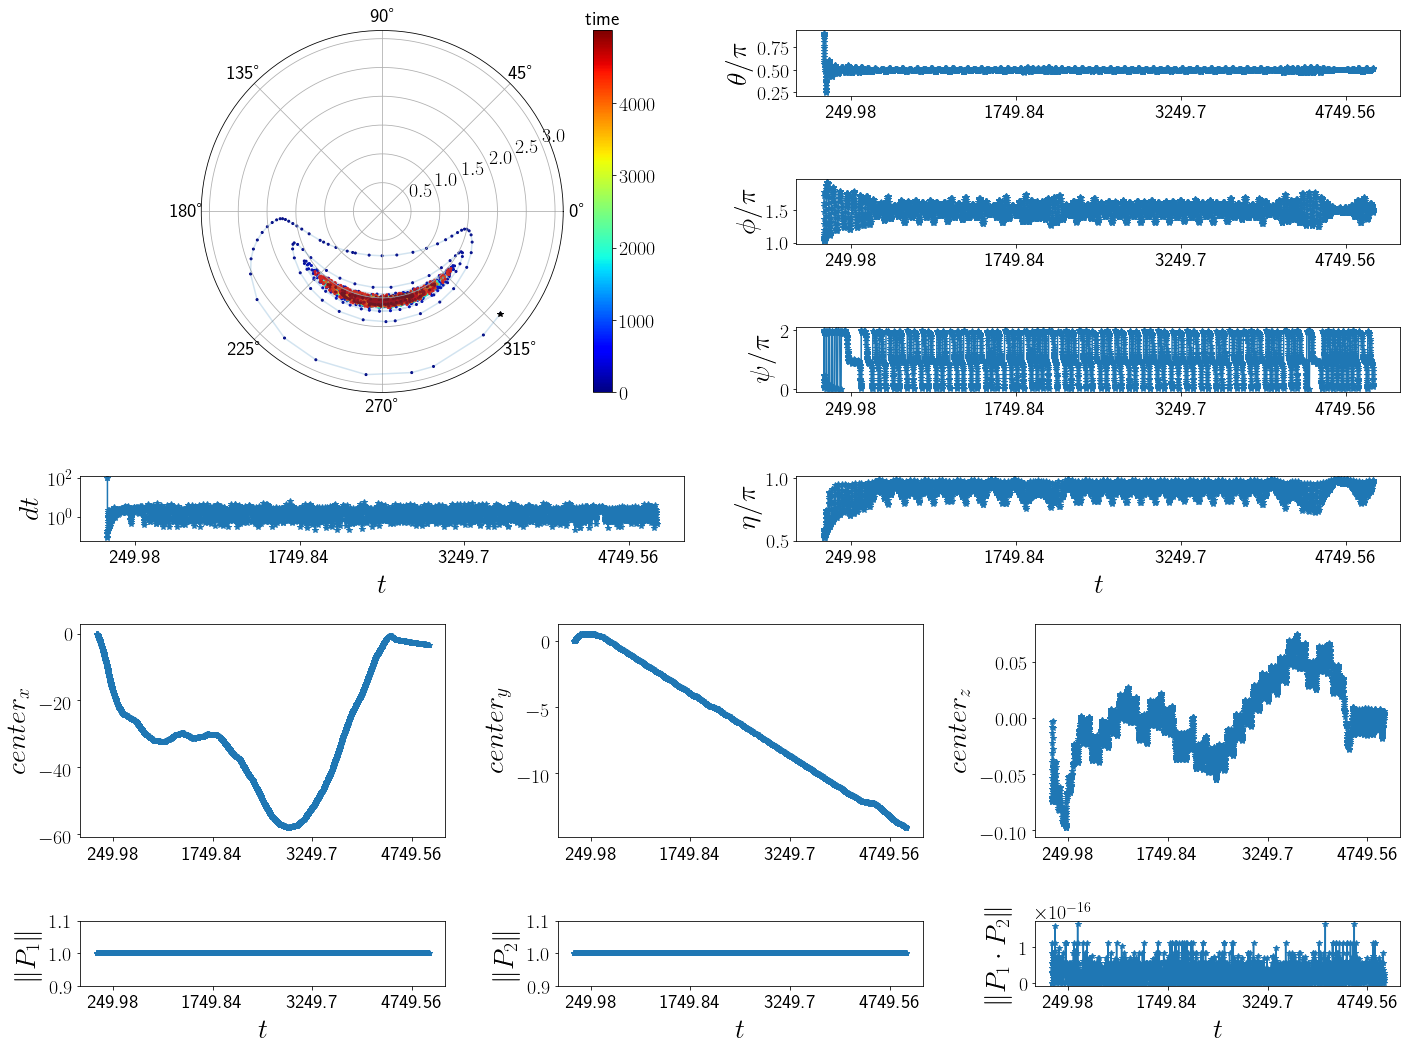

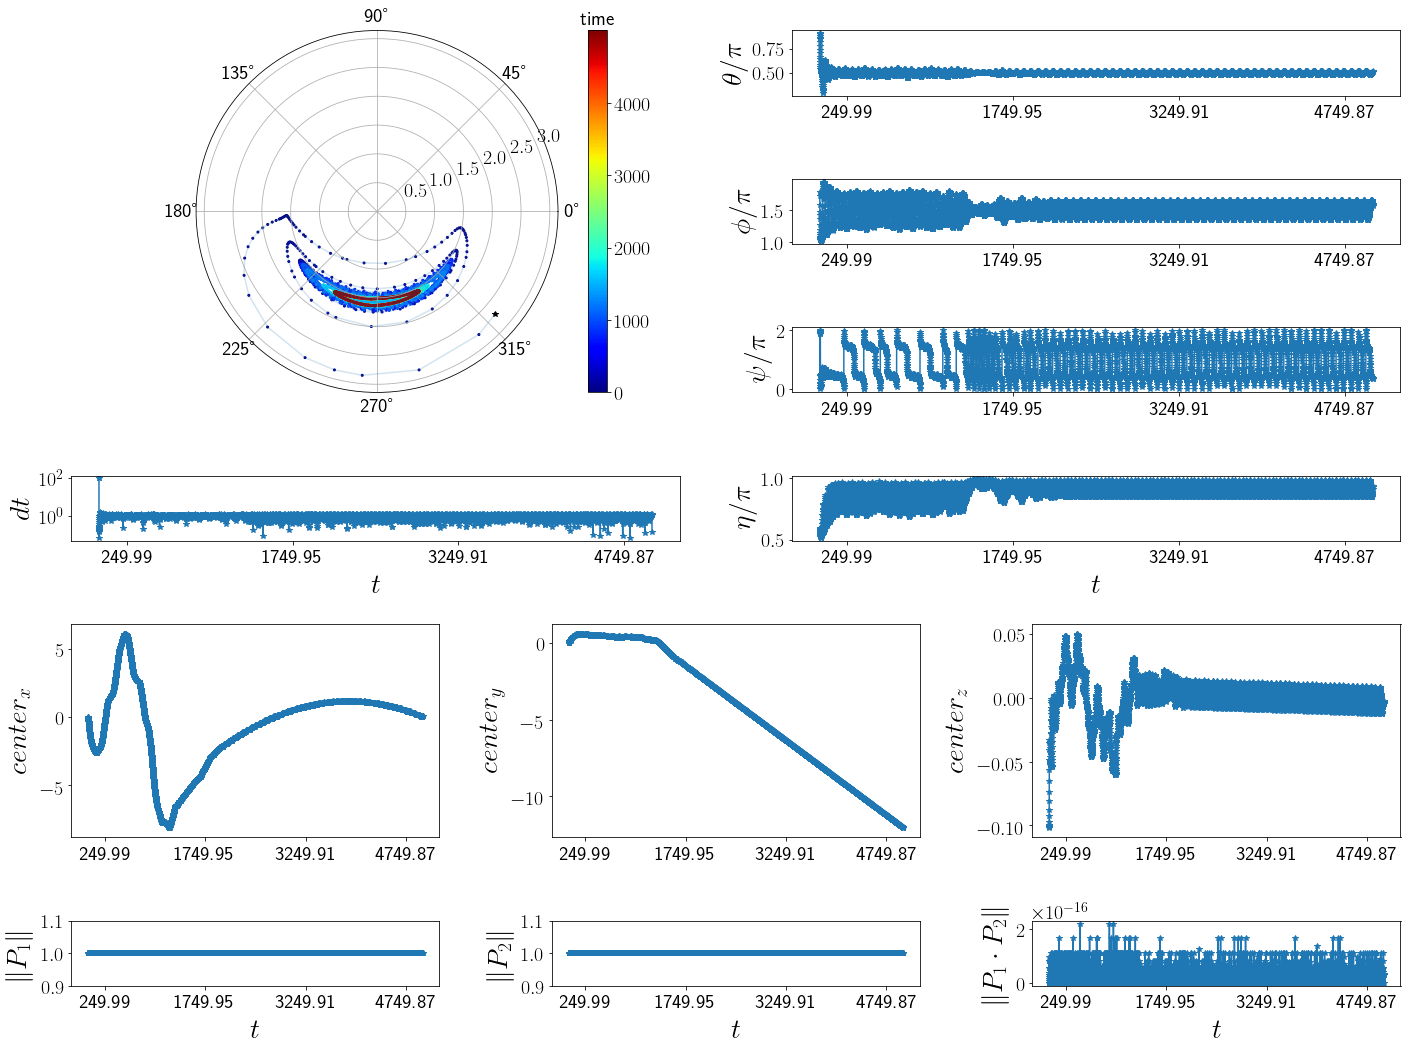

In [104]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
importlib.reload(jm)

t0 = time()
t_theta, t_phi, t_psi = 2.713194, 5.569187, 0
max_t = 5000
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 100
save_every = 1
table_name='ecoC01B05_tao1_wm0.7'
omega_tail=0.7

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi

ta = spf_tb.do_calculate_ecoli_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta = ta
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

tb = spf_tb.do_calculate_ecoli_Petsc4nPsi(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta = tb
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)



load table_data from idx034_th0.000_ph0.000_ps0.000.pickle


True

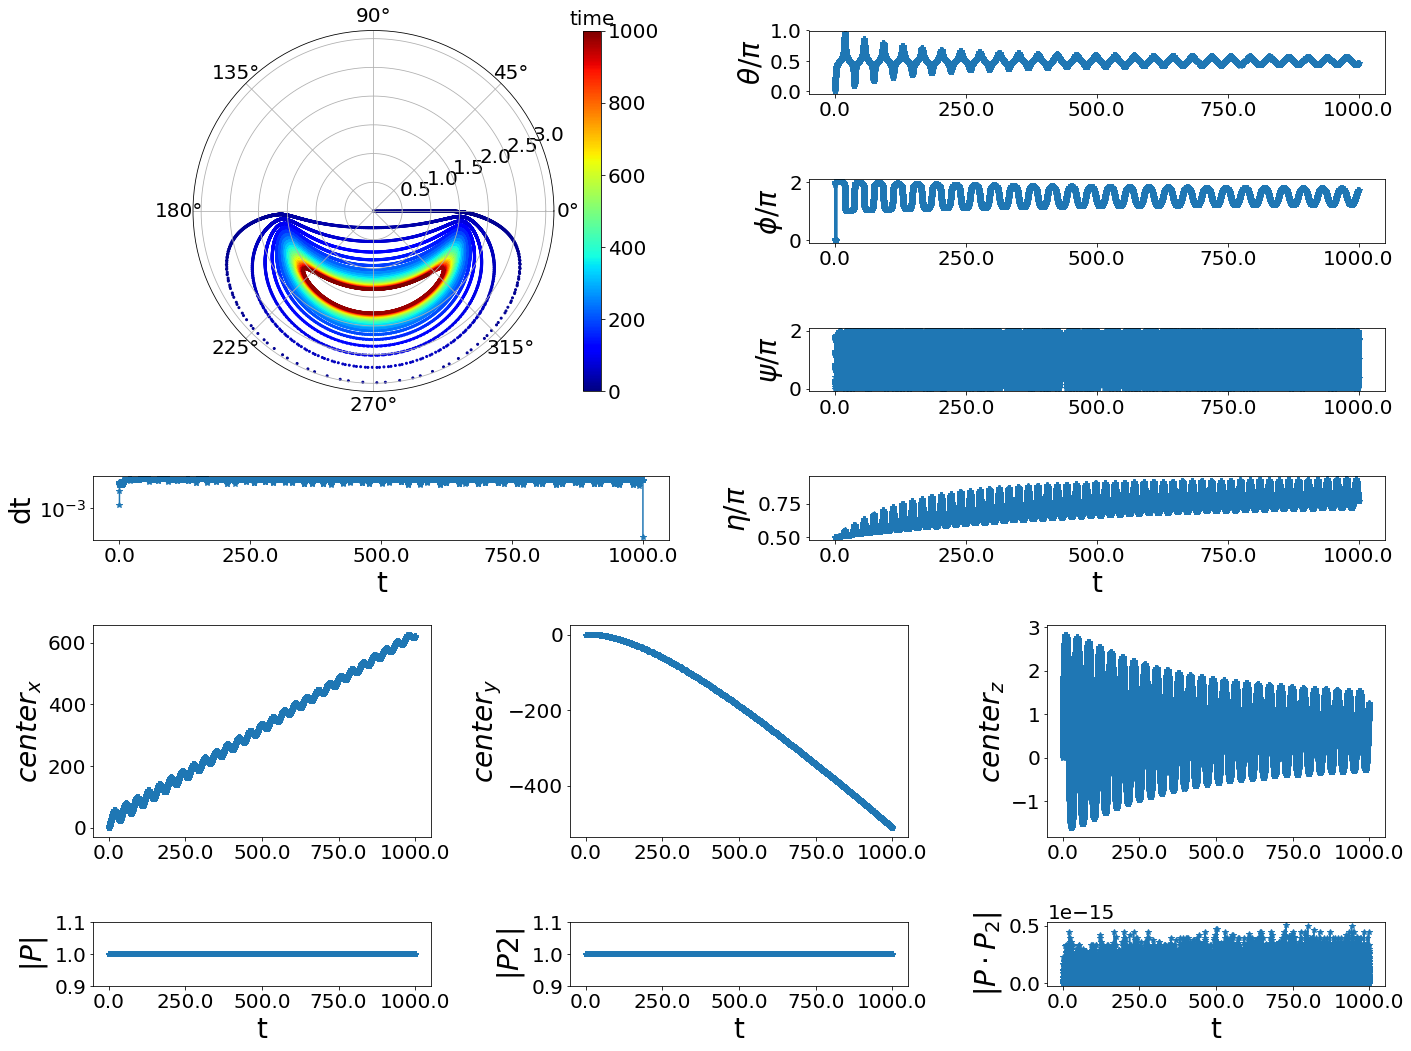

In [3]:
t_theta, t_phi, t_psi = 0, 0, 0
idx = 34
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
with open('../motion_ecoliB01_table/%s' % t_name, 'rb') as handle:
    tpick = pickle.load(handle)
(t_theta, t_phi, t_psi, 
 max_t, update_fun, rtol, atol, eval_dt, 
 Table_t, Table_X, Table_P, Table_P2, 
 Table_theta, Table_phi, Table_psi, Table_eta, 
 save_every) = tpick
Table_dt = np.hstack((np.diff(Table_t), 0))
print('load table_data from %s' % t_name)

spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)